In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
!pip install seaborn

# Loading the data and a first look

In [106]:
data=pd.read_csv("test.csv")
data.shape

(147546, 19)

In [107]:
data.head()

,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,7,5,21,145,3,807,1,MN31,1,MN17,-73.951279,40.769939,-73.973137,40.759491,2,1,2.27,10.5,MN31-MN17
1,0,5,21,142,7,1458,1,MN23,3,BK73,-73.998993,40.730064,-73.959808,40.710918,1,1,3.20,18.0,MN23-BK73
2,23,5,18,125,4,495,1,MN27,3,BK76,-73.994148,40.717796,-73.948204,40.722595,1,1,3.40,12.0,MN27-BK76
3,19,5,20,134,6,941,1,MN20,1,MN40,-73.979813,40.743240,-73.952881,40.780380,2,2,2.93,13.0,MN20-MN40
4,20,5,18,122,1,141,1,MN22,1,MN22,-73.983543,40.726109,-73.988991,40.729980,2,1,0.47,3.5,MN22-MN22


# Fixing column names

From the first 5 rows of the table, it looks like the column "Unnamed: 0" is just one more than the value of the index of each row. After testing that in fact this is true with an assertion, we removed the column.

In [108]:
data["Unnamed: 0"] = data["Unnamed: 0"].apply(lambda x: x-1)
assert np.array_equal(np.array(data.index), np.array(data["Unnamed: 0"]))
data = data.drop(["Unnamed: 0"], axis=1) ## redundant index column dropped

KeyError: 'Unnamed: 0'

Then we change the column name such as every word is divided by a '_' and that all letters are lower case. We also fixed a spelling mistake.

In [109]:
#unifying names 
data = data.rename(columns={"pickup_BoroCode":"pickup_boro_code","pickup_NTACode":"pickup_nta_code","dropoff_BoroCode":"dropoff_boro_code","dropoff_NTACode":"dropoff_nta_code", "pickup_doy":"pickup_day"})
data

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,7,5,21,145,3,807,1,MN31,1,MN17,-73.951279,40.769939,-73.973137,40.759491,2,1,2.27,10.5,MN31-MN17
1,0,5,21,142,7,1458,1,MN23,3,BK73,-73.998993,40.730064,-73.959808,40.710918,1,1,3.20,18.0,MN23-BK73
2,23,5,18,125,4,495,1,MN27,3,BK76,-73.994148,40.717796,-73.948204,40.722595,1,1,3.40,12.0,MN27-BK76
3,19,5,20,134,6,941,1,MN20,1,MN40,-73.979813,40.743240,-73.952881,40.780380,2,2,2.93,13.0,MN20-MN40
4,20,5,18,122,1,141,1,MN22,1,MN22,-73.983543,40.726109,-73.988991,40.729980,2,1,0.47,3.5,MN22-MN22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147541,12,5,20,134,6,2355,1,MN99,1,MN13,-73.956779,40.786560,-74.006859,40.744862,2,5,5.28,27.0,MN99-MN13
147542,9,5,21,144,2,824,1,MN17,1,MN15,-73.979660,40.761322,-74.001076,40.762772,1,2,1.50,10.0,MN17-MN15
147543,11,5,20,135,7,524,1,MN31,1,MN19,-73.957153,40.769859,-73.974380,40.751595,1,1,1.70,8.0,MN31-MN19
147544,15,5,18,125,4,946,1,MN17,1,MN13,-73.976196,40.763760,-73.985512,40.742229,2,1,1.84,11.0,MN17-MN13


# Understanding what each variable measures
We created the following function called *describe* that takes as input a column of the dataset and shows the number of observations of that column, the mean, std, min, max and the three quartiles. It also shows the set of values of the observations and also plots a histogram. 

In [110]:
def describe(column, n = 10):
    print(data[column].describe())
    if len(set(data[column]))>50:
        print(str(set(data[column][0:50]))[0:1000])
    else:
        print(set(data[column]))
    data[column].hist(bins = n) 

count    147546.000000
mean         13.617130
std           6.455395
min           0.000000
25%           9.000000
50%          14.000000
75%          19.000000
max          23.000000
Name: pickup_hour, dtype: float64
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


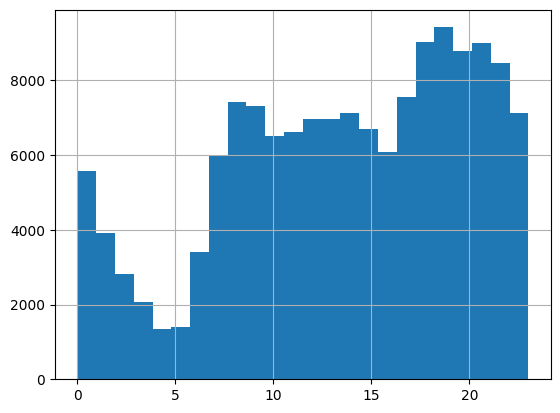

In [111]:
describe("pickup_hour", 24)

In the early morning between 1:00 and 6:00 we have a low in pickups, which is expected since mayority of people are sleeping at these hours. Then between 18:00 and 22:00 we see a clear high in pickups, something expected in a city like NYC that has a big nightlife.

count    147546.0
mean          5.0
std           0.0
min           5.0
25%           5.0
50%           5.0
75%           5.0
max           5.0
Name: pickup_month, dtype: float64
{5}


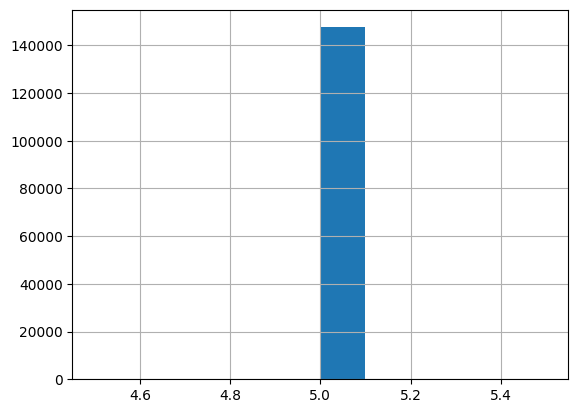

In [112]:
describe("pickup_month") 

The subset of datapoint is only from May. Dropping this column should be considered since it is explicitly said in the description and can be inferred from other columns.

count    147546.000000
mean         19.902485
std           1.278302
min          18.000000
25%          19.000000
50%          20.000000
75%          21.000000
max          22.000000
Name: pickup_week, dtype: float64
{18, 19, 20, 21, 22}


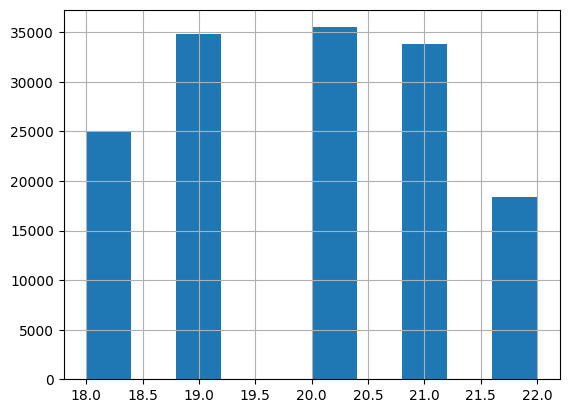

In [113]:
describe("pickup_week")

We have the 5 weeks May had that year. The first and last weeks may not have had all seven days in May and this might have cause both to be lower by a considerable margin compared to the other three.

count    147546.000000
mean        136.356757
std           8.665815
min         122.000000
25%         129.000000
50%         136.000000
75%         144.000000
max         152.000000
Name: pickup_day, dtype: float64
{128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 122, 123, 124, 125, 126, 127}


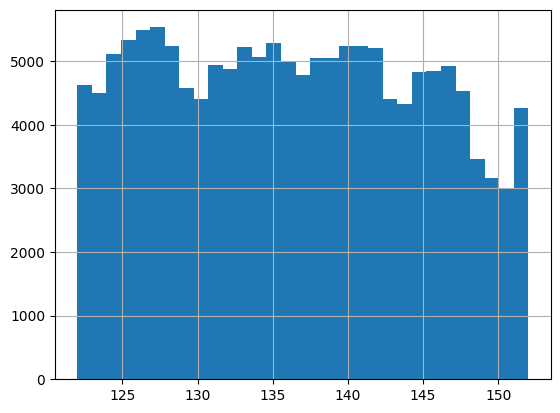

In [114]:
describe("pickup_day", 31)

All days of May seem to stay in a certain range, except the last days of the month which have a considerable dropoff.

count    147546.000000
mean          3.916440
std           1.979746
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max           7.000000
Name: pickup_wday, dtype: float64
{1, 2, 3, 4, 5, 6, 7}


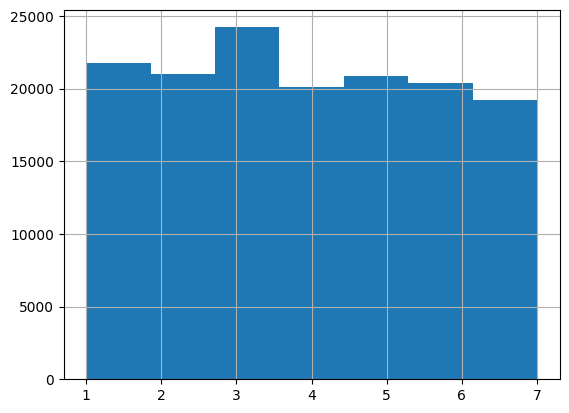

In [115]:
describe("pickup_wday", 7)

The weekdays seem to have a steady decline from 1 to 7, with week day 3 breaking this rule by being the mode. We cannot infer on why is this it is not explicitly said which number represents which day. We cannot assume 1 is monday and so on with no check.

count    147546.000000
mean        983.671296
std        2659.704599
min           0.000000
25%         435.000000
50%         716.000000
75%        1156.000000
max       86378.000000
Name: length_time, dtype: float64
{259, 1415, 777, 268, 141, 1422, 270, 911, 401, 1041, 788, 286, 3105, 802, 161, 807, 1319, 811, 941, 1965, 2352, 689, 1458, 435, 1589, 437, 183, 1085, 576, 323, 839, 2504, 457, 206, 977, 1109, 214, 726, 984, 732, 350, 1896, 495, 1776, 1649, 3059, 884, 1144, 1534}


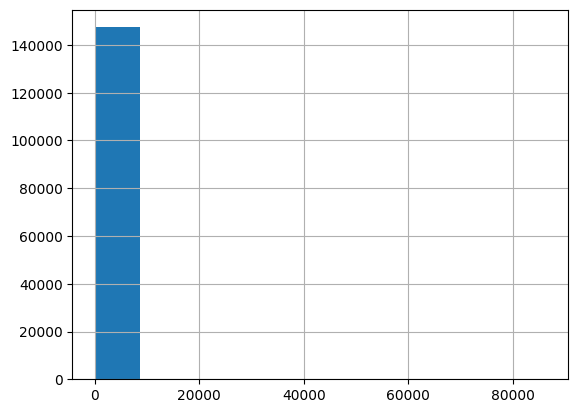

In [116]:
describe("length_time")

0.80000     1299.00000
0.90000     1760.00000
0.95000     2272.00000
0.99000     3604.00000
0.99500     4293.00000
0.99900     9434.50500
0.99905    33092.83775
Name: length_time, dtype: float64


<Axes: >

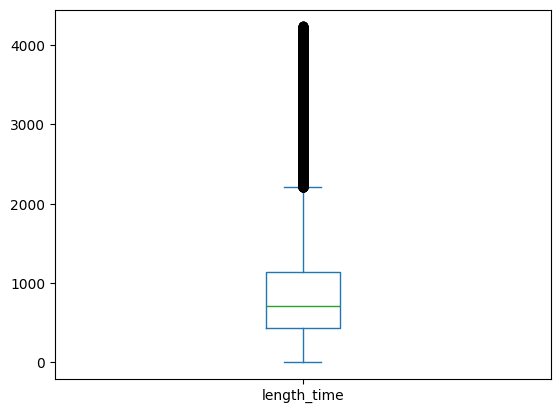

In [117]:
print(data["length_time"].quantile([0.8,0.9,0.95,0.99,0.995,0.999, 0.99905]))
data=data[data["length_time"]<=4236]
data["length_time"].plot.box() 

As we see there are a lot of outliers. It does not make sense that a taxi could take such long times when they are only working inside a city. The reason there are outliers could go from the taximeter being broke to the taxi driver leaving it running the whole day while not taking any rides. Rides that were less than one minute could be really short rides, missclicks by the driver which ended the ride early, or the ride ending in a short time by a situation with the passenger(s).

There are 3600 seconds is an hour, what to potentially do with that many outliers? Where could be the cutoff point? If we were to later remove outliers, we would propose a cutoff at 0.99 or 0.995 depending on the goal of the analysis for this dataset.

We have to investigate further. There are possible outliers in terms of time<60 and large time since we have time given in seconds.

In [118]:
data=data.loc[data["length_time"]>=60] 


Some of the rides are reasonable, somebody got a cab for like 0.2 km and that takes a minute.

In [119]:
data=data.loc[data["length_time"]>=10] 

We believe a ride has to last at least 10 seconds to be considered one, but we will not delete datapoints without having a goal for the dataset.

In [120]:
data=data.loc[data["trip_distance"]>=0.01]

count    146340.000000
mean          1.201196
std           0.725470
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: pickup_boro_code, dtype: float64
{1, 2, 3, 4, 5}


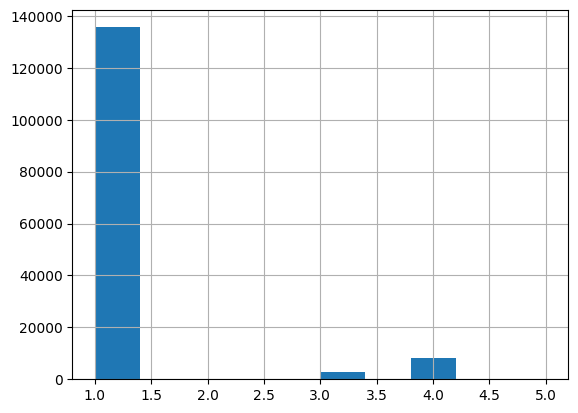

In [121]:
describe("pickup_boro_code") 

The five boroughs of NYC: 1 is Manhattan, 2 is The Bronx, 3 is Brooklyn,  4 is Queens, and 5 is Staten Island.

count    146340.000000
mean          1.268457
std           0.781657
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: dropoff_boro_code, dtype: float64
{1, 2, 3, 4, 5}


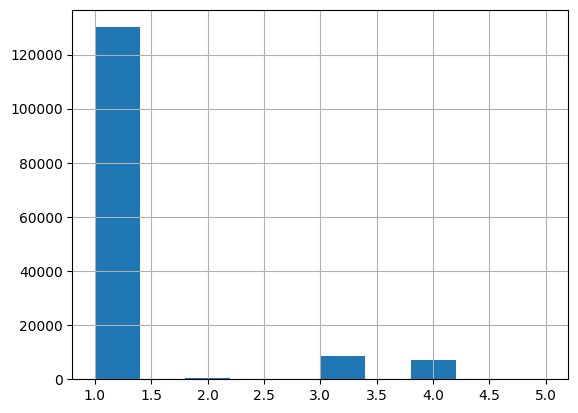

In [122]:
describe("dropoff_boro_code")

Also includes the 5 boroughs.

In [123]:
data["pickup_nta_code"].describe()

count     146340
unique       128
top         MN17
freq       22831
Name: pickup_nta_code, dtype: object

The letters represent the borough of the location and the numbers a part of the borough.

In [124]:
data["dropoff_nta_code"].describe()

count     146340
unique       188
top         MN17
freq       20978
Name: dropoff_nta_code, dtype: object

Same description as above.

count    146340.000000
mean        -73.974455
std           0.036446
min         -74.104080
25%         -73.992355
50%         -73.981979
75%         -73.967850
max         -73.728279
Name: pickup_longitude, dtype: float64
{-74.01410675048828, -74.00711059570312, -74.00691986083984, -74.00264739990234, -74.00157165527344, -73.98776245117188, -73.99122619628906, -73.97602844238281, -73.95738983154297, -73.98869323730469, -73.96554565429686, -73.9598159790039, -73.98416900634766, -73.9694595336914, -73.94755554199219, -73.98762512207031, -73.99098205566406, -73.91796112060547, -73.97987365722656, -73.9749526977539, -73.97794342041016, -73.96669006347656, -73.96186828613281, -73.9823989868164, -74.00421905517578, -73.78988647460938, -73.96875, -73.99907684326172, -73.7896957397461, -73.99899291992188, -73.97981262207031, -73.99414825439453, -73.95127868652344, -73.97752380371094, -73.9835433959961, -74.00103759765625, -74.00483703613281, -74.0030746459961, -74.00538635253906, -74.00138854

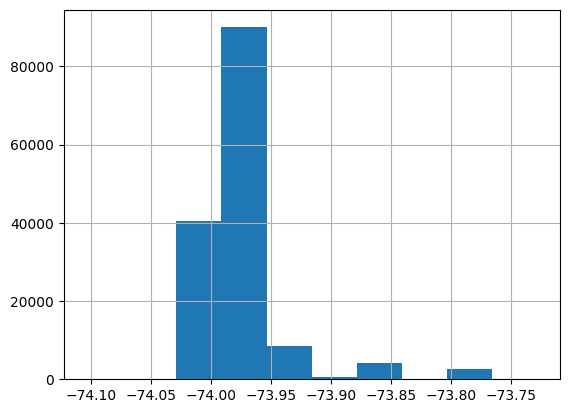

In [125]:
describe("pickup_longitude")

count    146340.000000
mean         40.750783
std           0.027030
min          40.575272
25%          40.736477
50%          40.753101
75%          40.768658
max          40.901031
Name: pickup_latitude, dtype: float64
{40.74567031860352, 40.77868270874024, 40.7309799194336, 40.72491836547852, 40.76993942260742, 40.74324035644531, 40.73006439208984, 40.7177963256836, 40.72610855102539, 40.72417068481445, 40.73799896240234, 40.7146110534668, 40.73262023925781, 40.72749328613281, 40.76820373535156, 40.72516632080078, 40.76097869873047, 40.773582458496094, 40.745235443115234, 40.76995086669922, 40.721290588378906, 40.68595504760742, 40.74285888671875, 40.72883605957031, 40.730018615722656, 40.753379821777344, 40.73554992675781, 40.72861099243164, 40.64678955078125, 40.67807388305664, 40.726409912109375, 40.64689254760742, 40.76565933227539, 40.78399658203125, 40.75212097167969, 40.804420471191406, 40.805419921875, 40.73675155639648, 40.75701904296875, 40.76898956298828, 40.771045684814

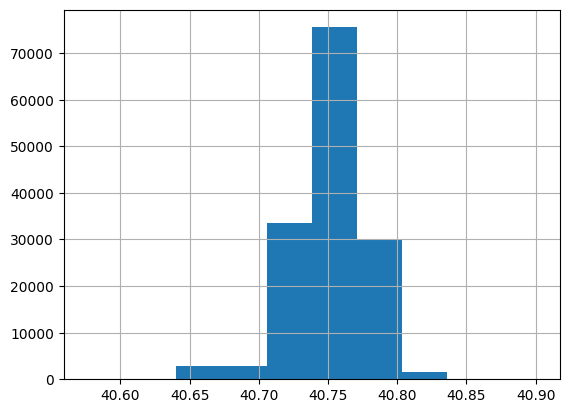

In [126]:
describe("pickup_latitude")

count    146340.000000
mean        -73.973838
std           0.032531
min         -74.234688
25%         -73.991577
50%         -73.979843
75%         -73.963455
max         -73.701439
Name: dropoff_longitude, dtype: float64
{-74.00248718261719, -74.00328826904297, -74.00729370117188, -74.00554656982422, -74.01638793945312, -73.95930480957031, -73.95980834960938, -73.87120056152344, -73.9981918334961, -73.95750427246094, -73.98490142822266, -73.86563873291016, -73.97638702392578, -73.97936248779297, -73.97242736816406, -73.98028564453125, -73.97830200195312, -73.98619079589844, -73.9474868774414, -73.92219543457031, -73.94305419921875, -73.97913360595703, -73.93083953857422, -73.94721221923828, -73.9661865234375, -74.0000228881836, -73.97886657714844, -73.9634017944336, -73.9729232788086, -73.96219635009766, -73.94219207763672, -73.9889907836914, -73.94820404052734, -73.952880859375, -73.97313690185547, -73.9925308227539, -73.97492980957031, -73.9735107421875, -73.96980285644531, -73.99

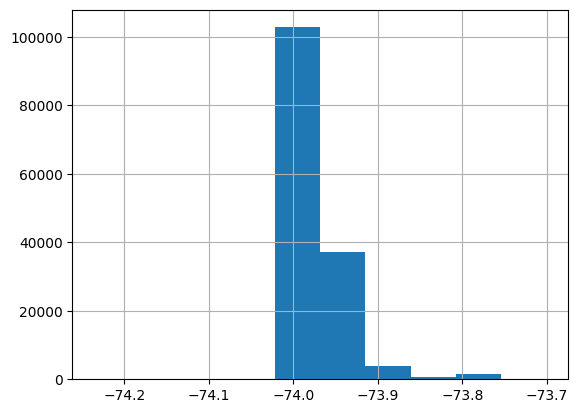

In [127]:
describe("dropoff_longitude")

count    146340.000000
mean         40.751282
std           0.031436
min          40.502365
25%          40.734703
50%          40.753639
75%          40.770149
max          40.911293
Name: dropoff_latitude, dtype: float64
{40.73199844360352, 40.73667144775391, 40.73486709594727, 40.71844100952149, 40.79244995117188, 40.74322891235352, 40.75949096679688, 40.78038024902344, 40.71091842651367, 40.72259521484375, 40.72998046875, 40.73892974853516, 40.60418319702149, 40.77407836914063, 40.7380485534668, 40.74545669555664, 40.74238967895508, 40.74169921875, 40.76219177246094, 40.71417999267578, 40.88087844848633, 40.71682357788086, 40.67522048950195, 40.75490188598633, 40.748565673828125, 40.80197143554688, 40.7290267944336, 40.77092361450195, 40.76567840576172, 40.749298095703125, 40.75770950317383, 40.68596649169922, 40.77553176879883, 40.74884796142578, 40.78376388549805, 40.76742172241211, 40.75714874267578, 40.74506759643555, 40.71009826660156, 40.78783798217773, 40.786529541015625, 40

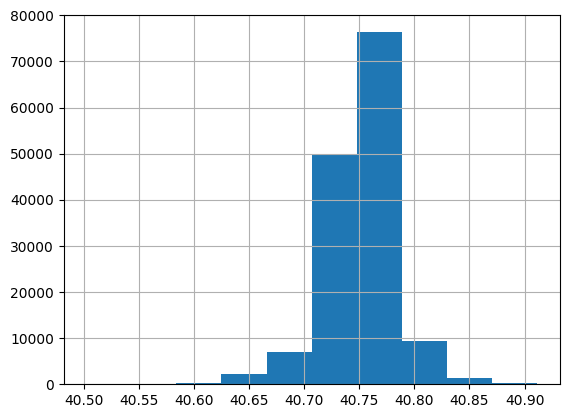

In [128]:
describe("dropoff_latitude")

Longitude in both cases is centered around -74 and latitude is centered around 40.75.

count    146340.000000
mean          1.526206
std           0.499314
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: vendor_id, dtype: float64
{1, 2}


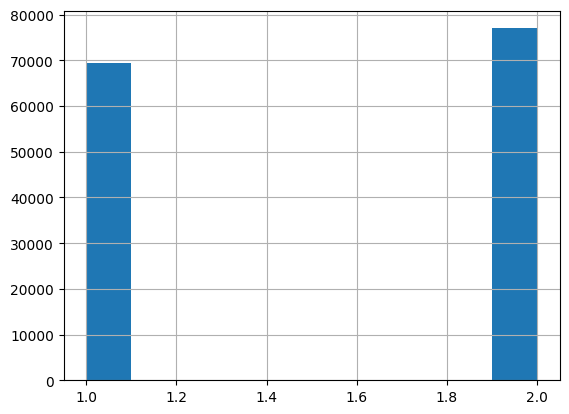

In [129]:
describe("vendor_id")

The second provider gave more rides than the first one by a small margin relatively speaking.

count    146340.000000
mean          1.637515
std           1.289589
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64
{0, 1, 2, 3, 4, 5, 6}


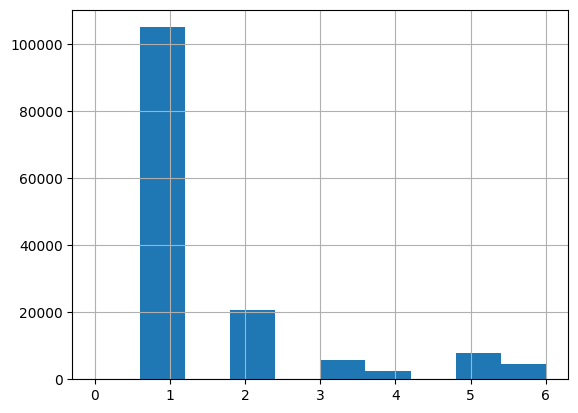

In [130]:
describe("passenger_count") 

As we see, mayority of rides are for single passengers by a big margin.

In [131]:
data.loc[data["passenger_count"]==0] 

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
79723,21,5,19,132,4,614,1,MN22,1,MN20,-73.982872,40.722824,-73.974037,40.737209,1,0,1.5,8.5,MN22-MN20
98068,19,5,19,132,4,981,1,MN17,1,MN17,-73.987572,40.754566,-73.972031,40.762836,1,0,1.5,11.0,MN17-MN17
108746,23,5,19,132,4,517,1,MN12,1,MN17,-73.980247,40.782402,-73.986267,40.760601,1,0,1.8,8.5,MN12-MN17
110841,18,5,19,132,4,1046,1,MN15,1,MN13,-73.989029,40.759266,-73.996452,40.742924,1,0,1.6,12.5,MN15-MN13


We believe there should not be any rides with 0 passengers, so in future steps we would consider removing these rows.

count    146340.000000
mean          5.010821
std         742.398227
min           0.010000
25%           1.100000
50%           1.830000
75%           3.400000
max      284000.000000
Name: trip_distance, dtype: float64
{0.47, 1.38, 2.93, 3.4, 2.27, 3.2, 0.71, 6.69, 0.43, 0.82, 3.0, 11.4, 12.8, 4.36, 14.81, 7.6, 16.12, 16.29, 3.41, 18.89, 18.91, 13.1, 0.6, 5.1, 1.0, 1.5, 7.82, 7.17, 1.1, 0.92, 3.28, 10.3, 10.61, 1.61, 2.0, 0.79, 1.58, 1.37, 2.12, 3.54, 0.8, 4.2, 1.97, 1.3, 0.89, 0.9, 2.98, 3.57, 1.99}


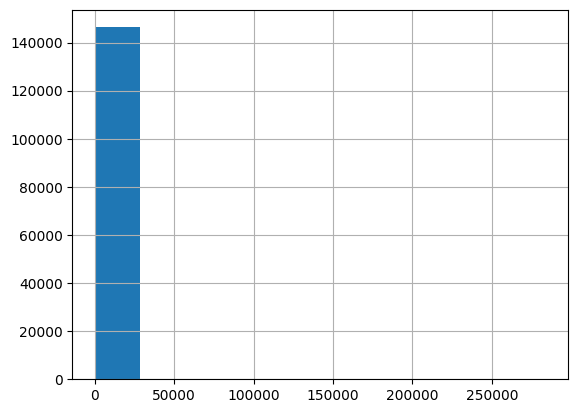

In [132]:
describe("trip_distance")

As we see as before there are outliers where the distance is 0 and where the distance is very large.

<Axes: >

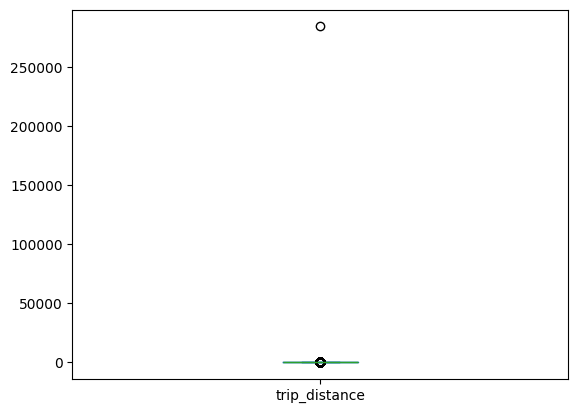

In [133]:
data["trip_distance"].plot.box()

We see a big outlier, for now the only reasonable explanation we have for it is that it was a missinput.

In [134]:
data=data.loc[data["trip_distance"]<100]

count    146339.000000
mean         13.243125
std           9.874895
min           0.010000
25%           7.000000
50%          10.000000
75%          15.500000
max          84.500000
Name: fare_amount, dtype: float64
{3.5, 4.0, 4.5, 6.0, 7.0, 5.5, 6.5, 10.5, 11.5, 12.0, 13.0, 11.0, 15.5, 9.0, 14.0, 18.0, 19.0, 12.5, 13.5, 22.5, 23.5, 24.0, 25.0, 5.0, 29.5, 32.5, 36.0, 7.5, 38.5, 41.5, 44.0, 9.5, 48.0, 10.0, 52.0, 16.5, 16.0}


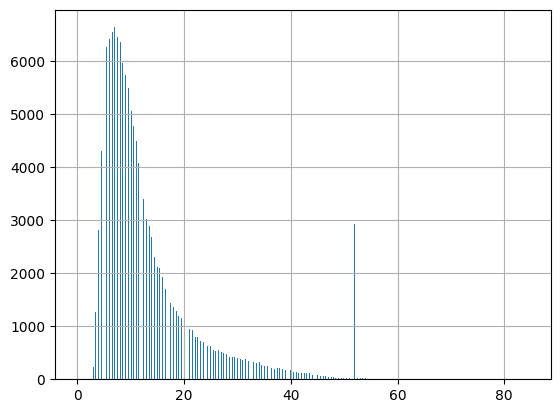

In [135]:
describe("fare_amount", 500)

We see mayority of the fares are in the lower values. We have an interesting spike at around the 50 dollars, which is the cost of a cab to JFK airport. We will explore this later on in this file.

In [136]:
data["pair"].describe()

count        146339
unique         3324
top       MN17-MN17
freq           4224
Name: pair, dtype: object

## Linear model to identify outliers

We decided to create a linear model in order to help identify the outliers with the lenght of the trip or its distance. As the fare is the result of the cab fee (once you enter) plus some amount given the time and distance you drive, we decided to use the linear model to predict what the fare should be. Below we first get rid of the outliers for training the model:

In [137]:
df = data.loc[data["length_time"]<data["length_time"].quantile(0.995)]
df = df.loc[df["length_time"]>df["length_time"].quantile(0.005)]
df = df.loc[df["trip_distance"]<df["trip_distance"].quantile(0.995)]
df = df.loc[df["trip_distance"]>df["trip_distance"].quantile(0.005)]

Now we make a simple linear regression and retrieve the coefficients and intercept to create 'predicted_fare' variable. Finally we create 'pred_diff' to check for major differences between the paid fare and the model prediction:

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[["trip_distance", "length_time"]]
y = df["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.coef_#
#model.intercept_

data['predicted_fare'] = data['trip_distance']*model.coef_[0] + data['length_time']*model.coef_[1] + model.intercept_
data['pred_diff'] = data['predicted_fare'] - data['fare_amount']

As we can see in general the predicted fare is very close to the actual fare_amount:

In [139]:
data[['fare_amount', 'predicted_fare', 'pred_diff']].head()

,fare_amount,predicted_fare,pred_diff
0,10.5,11.253213,0.753213
1,18.0,16.909274,-1.090726
2,12.0,11.591685,-0.408315
3,13.0,13.324187,0.324187
4,3.5,3.824732,0.324732


And when sorted we can see the outliers being identified. For example a trip distance of 12000000 makes the predicted fare far off what was actually paid. Similarly it works for super short or long rides in terms of time. To identify which values of pred_diff are that of outliers the distribution of pred_diff needs to be examined:

In [140]:
data.sort_values(by='pred_diff', ascending=False)

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff
123140,13,5,21,144,2,2276,1,MN99,4,QN98,-73.958427,40.800171,-73.786880,40.647285,1,1,18.00,0.01,MN99-QN98,50.394852,50.384852
61593,17,5,19,129,1,3512,4,QN98,1,MN17,-73.789223,40.646832,-73.986115,40.752087,1,1,30.80,52.00,QN98-MN17,82.486318,30.486318
61792,16,5,18,122,1,3701,4,QN98,1,MN32,-73.776840,40.645851,-73.956154,40.774277,1,1,29.50,52.00,QN98-MN32,81.090247,29.090247
141559,17,5,18,125,4,4180,4,QN98,1,MN25,-73.789764,40.643417,-74.016930,40.705204,2,1,27.93,52.00,QN98-MN25,80.889592,28.889592
144544,8,5,18,123,2,3287,1,MN13,4,QN98,-73.994705,40.746098,-73.784439,40.643265,1,1,30.60,52.00,MN13-QN98,80.766438,28.766438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126222,16,5,18,124,3,170,1,MN20,1,MN21,-73.975906,40.745594,-73.980736,40.738083,1,2,0.60,52.00,MN20-MN21,4.248089,-47.751911
98789,19,5,20,136,1,229,1,MN27,1,MN22,-73.985657,40.721802,-73.991440,40.724537,1,1,0.40,52.00,MN27-MN22,4.210567,-47.789433
29243,12,5,22,151,2,112,1,MN17,1,MN17,-73.985283,40.753616,-73.979179,40.762028,2,2,0.68,52.00,MN17-MN17,4.059319,-47.940681
96920,18,5,21,147,5,293,1,MN20,1,MN20,-73.975952,40.748539,-73.977638,40.749779,1,1,0.10,52.00,MN20-MN20,4.009151,-47.990849


Here we can see that in general the difference is very close to 0. Sometimes bigger differences are produced on long rides. We excluded the fares equal to 52 here as the airport rides skew the fare that is paid (usually they pay way less then what they would for the same length/distance)

In [141]:
df = data.loc[data['pred_diff']<data['pred_diff'].quantile(0.995)]
df = df.loc[df['pred_diff']>df['pred_diff'].quantile(0.005)]
df = df.loc[df['fare_amount']!=52]
df['pred_diff'].describe()

count    143306.000000
mean          0.033948
std           0.595316
min          -3.935656
25%          -0.236256
50%           0.042307
75%           0.321286
max           5.505858
Name: pred_diff, dtype: float64

<Axes: >

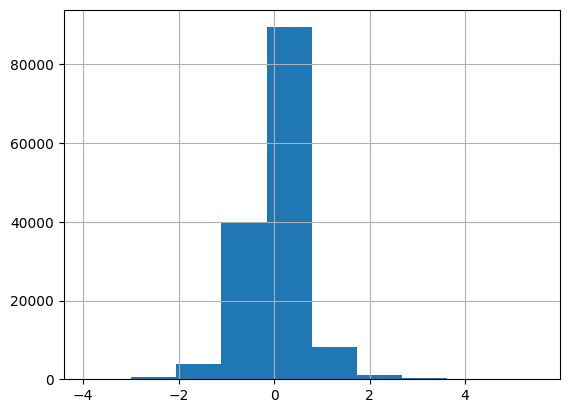

In [142]:
df['pred_diff'].hist()

Based on this we can come up with threshold for outliers, for example a bound [-4,4] could be a potentiall proposal. Every ride with values outside of this bound should be treated as an outlier and deleted or imputed for modelling purposes. However, here we do not delete any observations, nor do we try to impute the outliers, as we do not know which part of the fare equation is wrong - the time of the trip, the distance, or the fare. 

## Checking if structural constraints are met

### Taxi Fare constraint

In the following link: https://www.nytimes.com/2022/11/17/nyregion/taxi-fare-hike-nyc.html we found information about the taxi rates of the period 2012-2022, which includes our period of interest May 2015.



#### JFK trips

Every ride from or to JFK costs 52 dollars. We should check that this is actually true for all data points. JFK's coordinates are 40.6446° N, 73.7797° W. Despite this we need to know the range of coordinates from which taxis start or end their trip which is still considered JFK according to fares.  
First, using Google maps, I created a large rectangle with the coordinates which for sure includes all of JFK. Then, looking at the pickup trips that have fares which are exactly $52, the fare for the airport, I found the minimum and maximum lognitudes and latitudes of the JFK area. 

In [143]:
pickup_mask = (data["pickup_longitude"] > -73.79) &  (data["pickup_longitude"] < -73.76 ) &  (data["pickup_latitude"] > 40.6 ) &  (data["pickup_latitude"] <40.66  )
airport_pickup = data.loc[(data["fare_amount"] == 52) & (pickup_mask)]

JFK_min_long = min(airport_pickup["pickup_longitude"])
JFK_max_long = max(airport_pickup["pickup_longitude"])
JFK_min_lat = min(airport_pickup["pickup_latitude"])
JFK_max_lat = max(airport_pickup["pickup_latitude"])

airport_pickup_dropoff_mask =  ((data["pickup_longitude"] >= JFK_min_long) & (data["pickup_longitude"] <= JFK_max_long) &  (data["pickup_latitude"] >= JFK_min_lat ) &  (data["pickup_latitude"] <= JFK_max_lat)) |(data["dropoff_longitude"] > JFK_min_long) & (data["dropoff_longitude"] < JFK_max_long) &  (data["dropoff_latitude"] > JFK_min_lat ) &  (data["dropoff_latitude"] <JFK_max_lat)
airport_pickup_mask =  (data["pickup_longitude"] >= JFK_min_long) & (data["pickup_longitude"] <= JFK_max_long) &  (data["pickup_latitude"] >= JFK_min_lat )  &  (data["pickup_latitude"] <= JFK_max_lat)
airport_dropoff_mask = (data["dropoff_longitude"] >= JFK_min_long) & (data["dropoff_longitude"] <= JFK_max_long) &  (data["dropoff_latitude"] >= JFK_min_lat ) &  (data["dropoff_latitude"] <= JFK_max_lat)

#Rides to and from the airport
data.loc[ (data["fare_amount"] == 52) & airport_pickup_dropoff_mask]

# JFK_max_lat, JFK_min_lat, JFK_max_long, JFK_min_long

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff
14,12,5,22,148,6,3105,4,QN98,1,MN20,-73.789886,40.646790,-73.978867,40.749298,2,1,16.29,52.0,QN98-MN20,51.996607,-0.003393
25,6,5,21,143,1,1965,1,MN12,4,QN98,-73.969460,40.800419,-73.787979,40.647461,2,1,18.89,52.0,MN12-QN98,50.274817,-1.725183
26,6,5,19,129,1,1589,1,MN04,4,QN98,-73.947556,40.825233,-73.788742,40.647404,2,1,18.91,52.0,MN04-QN98,48.086172,-3.913828
69,19,5,20,135,7,4063,4,QN98,1,MN17,-73.784950,40.648552,-73.984070,40.749374,2,2,18.02,52.0,QN98-MN17,61.019377,9.019377
176,6,5,21,146,4,1293,1,MN20,4,QN98,-73.979172,40.748589,-73.787064,40.646809,2,1,16.12,52.0,MN20-QN98,40.933718,-11.066282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147266,13,5,20,139,4,3636,4,QN98,1,MN13,-73.781059,40.646599,-73.989937,40.735283,1,1,18.00,52.0,QN98-MN13,58.451213,6.451213
147333,13,5,20,138,3,2605,4,QN98,1,MN04,-73.786148,40.641617,-73.947739,40.830402,1,1,20.00,52.0,QN98-MN04,56.214039,4.214039
147366,19,5,20,139,4,3653,1,MN32,4,QN98,-73.955154,40.776863,-73.782822,40.644054,1,1,19.00,52.0,MN32-QN98,60.487047,8.487047
147383,18,5,21,143,1,2936,1,MN09,4,QN98,-73.962288,40.800034,-73.789246,40.647213,2,2,19.17,52.0,MN09-QN98,56.568658,4.568658


Below I am plotting two plots:  
+ In the first one, I plotted in blue the location of the dropoffs of rides we assume are going to the airport and have the regular flat fare of 52 dollars. In red, I plotted the location of the dropoffs of rides we assume are going to the airport but haven't paid 52 dollars.  
+ In the second plot, I have plotted the exact same thing but for rides which had the airport as a pickup and not as a dropoff location.      


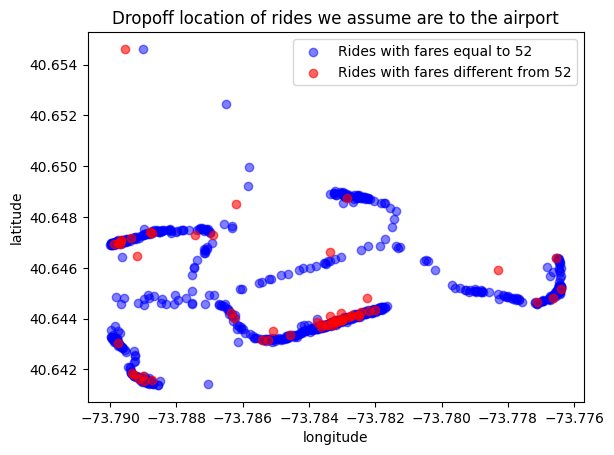

In [144]:
plt.scatter(data.loc[(data["fare_amount"] == 52) & (airport_dropoff_mask)]['dropoff_longitude'],data.loc[(data["fare_amount"] == 52) & (airport_dropoff_mask)]['dropoff_latitude'], color = 'blue', label = "Rides with fares equal to 52", alpha = 0.5)
plt.scatter(data.loc[(data["fare_amount"] != 52) & (airport_dropoff_mask)]['dropoff_longitude'],data.loc[(data["fare_amount"] != 52) & (airport_dropoff_mask)]['dropoff_latitude'], color = 'red', label = "Rides with fares different from 52", alpha = 0.6)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Dropoff location of rides we assume are to the airport')
plt.legend()

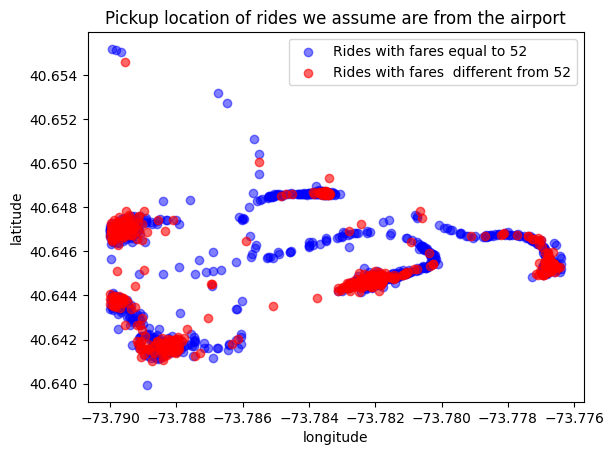

In [145]:

plt.scatter(data.loc[(data["fare_amount"] == 52) & (airport_pickup_mask)]['pickup_longitude'],data.loc[(data["fare_amount"] == 52) & (airport_pickup_mask)]['pickup_latitude'], color = 'blue', label = "Rides with fares equal to 52", alpha = 0.5)
plt.scatter(data.loc[(data["fare_amount"] != 52) & (airport_pickup_mask)]['pickup_longitude'],data.loc[(data["fare_amount"] != 52) & (airport_pickup_mask)]['pickup_latitude'], color = 'red', label = "Rides with fares  different from 52", alpha = 0.6)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Pickup location of rides we assume are from the airport')
plt.legend()


In both these plots, we see that the red and blue rides are generally concentrated around the same lines, which most likely shows the taxi area in JFK. One possible explanation for the rides not priced at 52 dollars (the red ones) is that the taxi driver did not select the flat rate in the taximeter. Now, I test whether these non-52 dollars taxi rides to and from the airport can be predicted using the linear model previously explained, which performed really well for generic rides.


In [146]:
data_copy = data.copy(deep = True)
mispriced_rides = data_copy.loc[(data["fare_amount"] != 52) & (airport_pickup_dropoff_mask)]
mispriced_rides['pred_diff'].describe()

count    889.000000
mean       0.086340
std        2.488348
min      -19.826315
25%       -0.739840
50%        0.141616
75%        0.969529
max       50.384852
Name: pred_diff, dtype: float64

From the distribution of the pred_diff we see that most of the fares of the taxi rides to the airport not using the flat fare, can be predicted using the linear model. This brings further evidence that these rides were using the taximeter in the normal setting. We can also see that the minimum and the maximum difference between the predicted fare and the fare amount are quite large. This  most likely is due to certain rides with outliers in trip_distance and/or length_time as the linear model was created to predict only the more general cases. 

#### Minimum fare constraint
According to the article above, from 2012-2022, the base fair was 2.5 dollars so no trip can be less than that. As you can see below, in the dataset there are three trips that have a fare smaller than 2.5 dollars. Later on, during preprocessing, these rows will most likely be needed to be deleted as they don't satisfy the constraints of their variables. That also follows from the intercept found by the linear model - 2.16 - which is very close to the actual 2.5 dollar value.

In [147]:
data.loc[ data["fare_amount"] < 2.5 ]

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff
123140,13,5,21,144,2,2276,1,MN99,4,QN98,-73.958427,40.800171,-73.78688,40.647285,1,1,18.0,0.01,MN99-QN98,50.394852,50.384852


# Checking column types

In [148]:
data.dtypes

pickup_hour            int64
pickup_month           int64
pickup_week            int64
pickup_day             int64
pickup_wday            int64
length_time            int64
pickup_boro_code       int64
pickup_nta_code       object
dropoff_boro_code      int64
dropoff_nta_code      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
vendor_id              int64
passenger_count        int64
trip_distance        float64
fare_amount          float64
pair                  object
predicted_fare       float64
pred_diff            float64
dtype: object

## pickup_day Check
Since all the dates are in the month of May, pickup_day can only have values of a certain range.
All of our data come from May 2015. Since 2015 is not a leap year, February has 28 days, and of course January, March, and May have 31 while April has 30. By adding up these values we find what day of the year the 1st and the 31st of May are. 

In [149]:
min_may = 31+28+31+30+1 #1st of May
max_may = 31+28+31+30+31 #31st of May
min_may, max_may

(121, 151)

count    146339.000000
mean        136.353651
std           8.669687
min         122.000000
25%         129.000000
50%         136.000000
75%         144.000000
max         152.000000
Name: pickup_day, dtype: float64
{128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 122, 123, 124, 125, 126, 127}


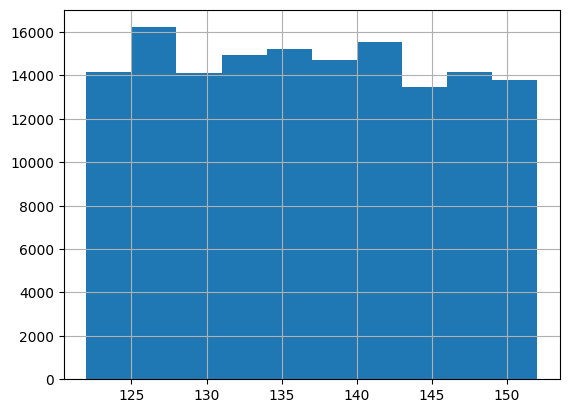

In [150]:
describe("pickup_day")

We see that the maximum pickup_day is 1 value higher than the day of the year that the 31st May is, which suggests that this variable is inflated by 1. This is also supported by the fact that otherwise there would be no rides on the 1st of May which would be surprising in such a large database. A reason behind these issue can be the fact that the day of the year is calculated as if the year was a leap year.

count    146339.000000
mean        135.353651
std           8.669687
min         121.000000
25%         128.000000
50%         135.000000
75%         143.000000
max         151.000000
Name: pickup_day, dtype: float64
{128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 121, 122, 123, 124, 125, 126, 127}


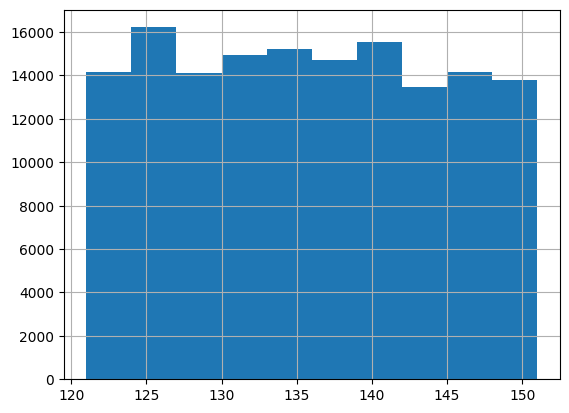

In [151]:
data["pickup_day"] = data["pickup_day"].apply(lambda x: x-1)
describe("pickup_day")

## Creating a date/time variable

The first 5 columns describe the time at which the ride took place with the accuracy to the closest hour at which ride initiated (we hypothesize here it may be different). 3 of them can be leveraged to obtain a datetime variable, reducing the neccesary size to store the same information, as we know the year is 2015. The week number and weekday can be deducted from the datetime variable, so we can also check their validity.

In [152]:
data['pickup_datetime'] = pd.to_datetime('2015' + '-' 
                                         + data['pickup_month'].astype(str) + '-' 
                                         + (data['pickup_day']).astype(str) + ' ' 
                                         + data['pickup_hour'].astype(str) + ':00:00', 
                                         format = '%Y-%m-%j %H:%M:%S')

data

,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime
0,7,5,21,144,3,807,1,MN31,1,MN17,-73.951279,40.769939,-73.973137,40.759491,2,1,2.27,10.5,MN31-MN17,11.253213,0.753213,2015-05-24 07:00:00
1,0,5,21,141,7,1458,1,MN23,3,BK73,-73.998993,40.730064,-73.959808,40.710918,1,1,3.20,18.0,MN23-BK73,16.909274,-1.090726,2015-05-21 00:00:00
2,23,5,18,124,4,495,1,MN27,3,BK76,-73.994148,40.717796,-73.948204,40.722595,1,1,3.40,12.0,MN27-BK76,11.591685,-0.408315,2015-05-04 23:00:00
3,19,5,20,133,6,941,1,MN20,1,MN40,-73.979813,40.743240,-73.952881,40.780380,2,2,2.93,13.0,MN20-MN40,13.324187,0.324187,2015-05-13 19:00:00
4,20,5,18,121,1,141,1,MN22,1,MN22,-73.983543,40.726109,-73.988991,40.729980,2,1,0.47,3.5,MN22-MN22,3.824732,0.324732,2015-05-01 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147541,12,5,20,133,6,2355,1,MN99,1,MN13,-73.956779,40.786560,-74.006859,40.744862,2,5,5.28,27.0,MN99-MN13,26.247987,-0.752013,2015-05-13 12:00:00
147542,9,5,21,143,2,824,1,MN17,1,MN15,-73.979660,40.761322,-74.001076,40.762772,1,2,1.50,10.0,MN17-MN15,9.863868,-0.136132,2015-05-23 09:00:00
147543,11,5,20,134,7,524,1,MN31,1,MN19,-73.957153,40.769859,-73.974380,40.751595,1,1,1.70,8.0,MN31-MN19,8.473755,0.473755,2015-05-14 11:00:00
147544,15,5,18,124,4,946,1,MN17,1,MN13,-73.976196,40.763760,-73.985512,40.742229,2,1,1.84,11.0,MN17-MN13,11.244515,0.244515,2015-05-04 15:00:00


## pickup_week Check

As we now have the pickup_datetime we can check whether the week numbers are correctly assigned in the dataset, using built in python methods for the datetime object:

In [153]:
df = data.copy()

df['week_number'] = df['pickup_datetime'].apply(lambda x: x.isocalendar()[1])
df['week_check'] = df['pickup_week'] - df['week_number']
df['week_check'].sum()

-40562

As we can see there are some issues with how week numbers are assigned

In [154]:
df[['pickup_week', 'week_number', 'week_check']].head()

,pickup_week,week_number,week_check
0,21,21,0
1,21,21,0
2,18,19,-1
3,20,20,0
4,18,18,0


I will run a couple checks to see where dates do not align:

In [155]:
df.loc[df['pickup_datetime'] == '2015-05-01'][['pickup_week', 'week_number', 'week_check']].head(1)

,pickup_week,week_number,week_check
585,18,18,0


In [156]:
df.loc[df['pickup_datetime'] == '2015-05-02'][['pickup_week', 'week_number', 'week_check']].head(1)

,pickup_week,week_number,week_check
264,18,18,0


In [157]:
df.loc[df['pickup_datetime'] == '2015-05-03'][['pickup_week', 'week_number', 'week_check']].head(1)

,pickup_week,week_number,week_check
609,18,18,0


In [158]:
df.loc[df['pickup_datetime'] == '2015-05-04'][['pickup_week', 'week_number', 'week_check']].head(1)

,pickup_week,week_number,week_check
5878,18,19,-1


In [159]:
df.loc[df['pickup_datetime'] == '2015-05-05'][['pickup_week', 'week_number', 'week_check']].head(1)

,pickup_week,week_number,week_check
96,18,19,-1


In [160]:
df.loc[df['pickup_datetime'] == '2015-05-06'][['pickup_week', 'week_number', 'week_check']].head(1)

,pickup_week,week_number,week_check
212,19,19,0


It seems to be some issue where it thinks may had 5 days not 3 in the first week. After reviewing the original dataset, as well as actual calendar from May 2015, it seems that indeed some of the 'pickup_week' entries are wrong. They actually follow a path of weeks given dates from 2013. Therefore, we decided to get rid of pickup_week columns and use the 'week_number' created below, so that weeks are that of May 2015. However, after deleting the column we change the name of 'week_number' back to the original, making sure it contains the correct values for every entry:

In [161]:
data['week_number'] = data['pickup_datetime'].apply(lambda x: x.isocalendar()[1])
data.drop(columns=['pickup_week'], axis=1, inplace=True)
data.rename(columns={'week_number': 'pickup_week'}, inplace=True)

## pickup_wday Check
Same analysis can be performed for week days, given the datetime column. We check the validity of the 'pickup_wday' compared to actual weekdays in the calendar:

In [162]:
df = data.copy()

df['day'] = df['pickup_datetime'].apply(lambda x: x.isocalendar()[2])
df['day_check'] = df['pickup_wday'] - df['day']
df['day_check'].sum()

-26868

Let's visualize what is the issue:

In [163]:
df.loc[df['pickup_datetime'] == '2015-05-01'][['pickup_wday', 'pickup_datetime', 'day']].head(1)

,pickup_wday,pickup_datetime,day
585,1,2015-05-01,5


In [164]:
df.loc[df['pickup_datetime'] == '2015-05-02'][['pickup_wday', 'pickup_datetime', 'day']].head(1)

,pickup_wday,pickup_datetime,day
264,2,2015-05-02,6


In [165]:
df.loc[df['pickup_datetime'] == '2015-05-03'][['pickup_wday', 'pickup_datetime', 'day']].head(1)

,pickup_wday,pickup_datetime,day
609,3,2015-05-03,7


In [166]:
df.loc[df['pickup_datetime'] == '2015-05-04'][['pickup_wday', 'pickup_datetime', 'day']].head(1)

,pickup_wday,pickup_datetime,day
5878,4,2015-05-04,1


It seems that the weekdays are just shifted. As in May 1st is weekday 1 - Monday - when actually its the 5th day in the calendar (confirmed with actual calendar as well). The following pattern continues for following days, with the 'pickup_wday' always being 4 days behind schedule. Kind of like using the calendar from May 2017 where the month indeed began on Monday. Therefore, we decide to clean using the same procedure as for week number:

In [167]:
data['weekday'] = data['pickup_datetime'].apply(lambda x: x.isocalendar()[2])
data.drop(columns=['pickup_wday'], axis=1, inplace=True)
data.rename(columns={'weekday': 'pickup_wday'}, inplace=True)

Finally we decided to change the weekday number to actual day names. We first add a column 'pickup_wday2' and confirm that the mapping 1: Monday, 2: Tuesday, etc:

In [168]:
data['pickup_wday2'] = data['pickup_datetime'].dt.strftime('%A')
data[['pickup_wday', 'pickup_wday2']].head()

,pickup_wday,pickup_wday2
0,7,Sunday
1,4,Thursday
2,1,Monday
3,3,Wednesday
4,5,Friday


In the end we get rid of the numerical version and change back the name:

In [169]:
data.drop(columns=['pickup_wday'], axis=1, inplace=True)
data.rename(columns={'pickup_wday2': 'pickup_wday'}, inplace=True)

This way the week days represent that of actual May 2015 not May 2017.

## Delete redundant datetime related columns

Now that we have the datetime column containg the information about month/day/hour there is no point in keeping the other 3 variables in the dataset:

In [170]:
data.drop(columns=['pickup_month', 'pickup_hour', 'pickup_day'], axis=1, inplace=True)

## Change type of vendor_id and pickup_week
Since vendor_id has only 2 possible values, it should be treated as categorical.
In this case same thing applies to pickup_week which has only 5 possible values. However if we were to have more weeks, ex. half a year or a year of weeks, then we could consider it numerical again.

In [171]:
data['vendor_id']=data['vendor_id'].map(str)
data['pickup_week']=data['pickup_week'].map(str)

# Plotting variables over time

Since we have created datetime variale, we can investigate the data over time and see whether there are any potential structure over time in the occurence of outliers. We should however note this is not a time series as multiple cabs operate at the same time and data overlaps, this however does not matter if we are only interested in outliers.

Outliers of time occur regularly with a kind of sinusoidal pattern

<Axes: xlabel='pickup_datetime'>

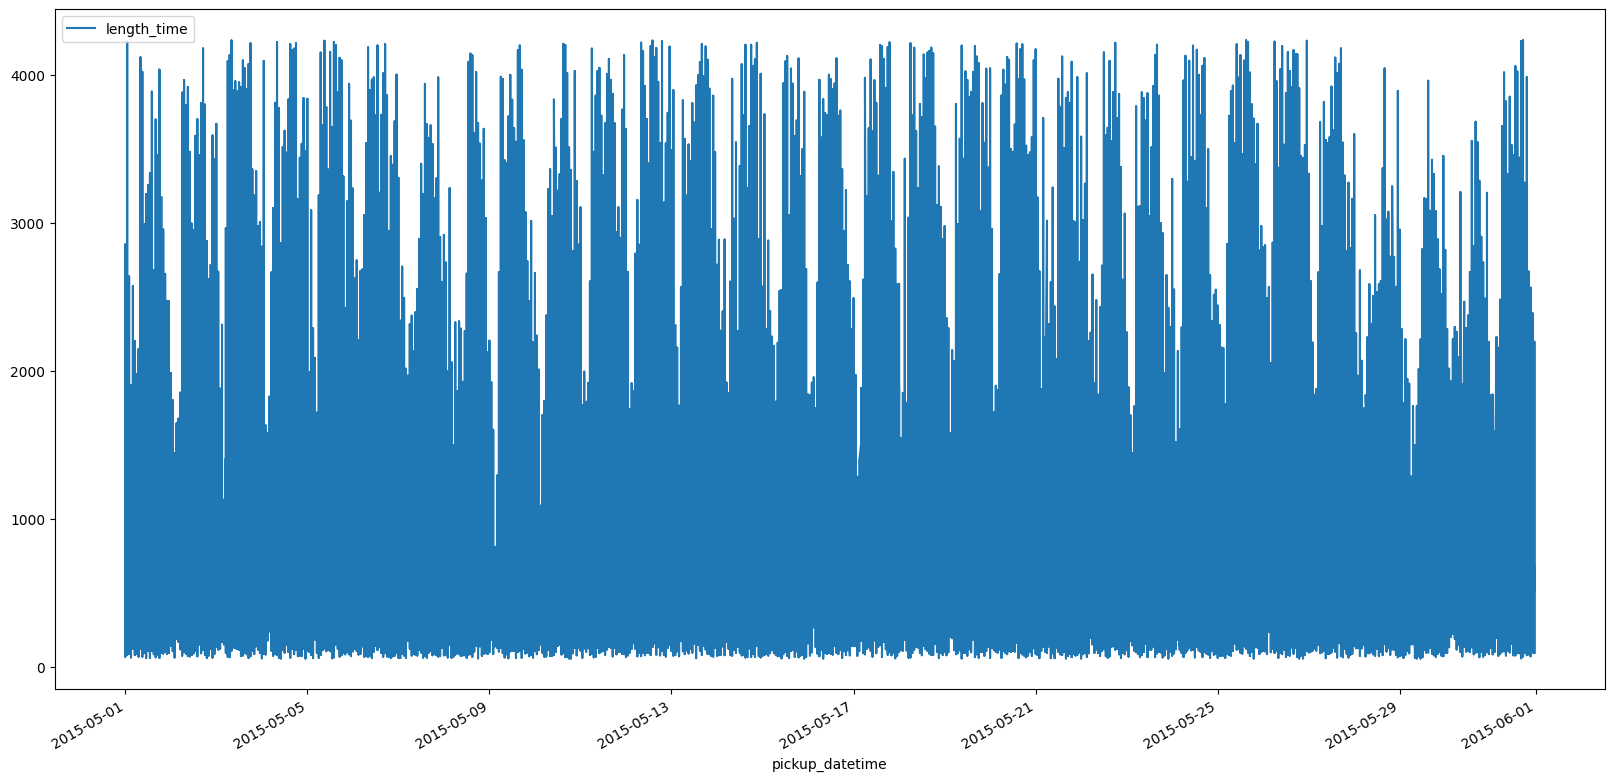

In [172]:
data.plot(x="pickup_datetime",y=["length_time"],figsize=(20, 10))

Outliers appear at random with regrads to time

<Axes: xlabel='pickup_datetime'>

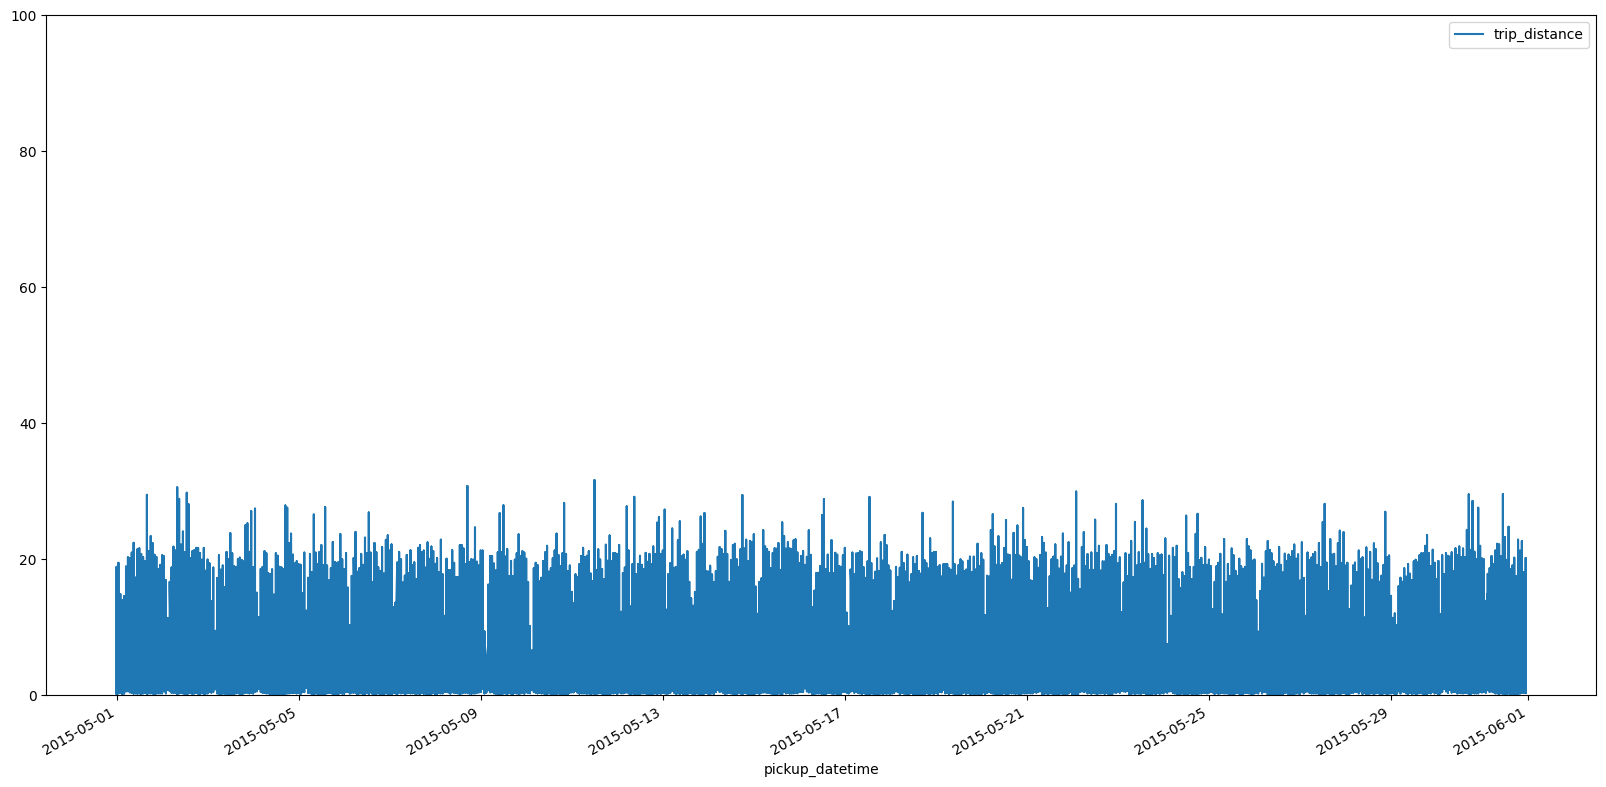

In [173]:
data.plot(x="pickup_datetime",y=["trip_distance"],figsize=(20, 10), ylim=[0,100])

Outliers appear at random with regards to fare

<Axes: xlabel='pickup_datetime'>

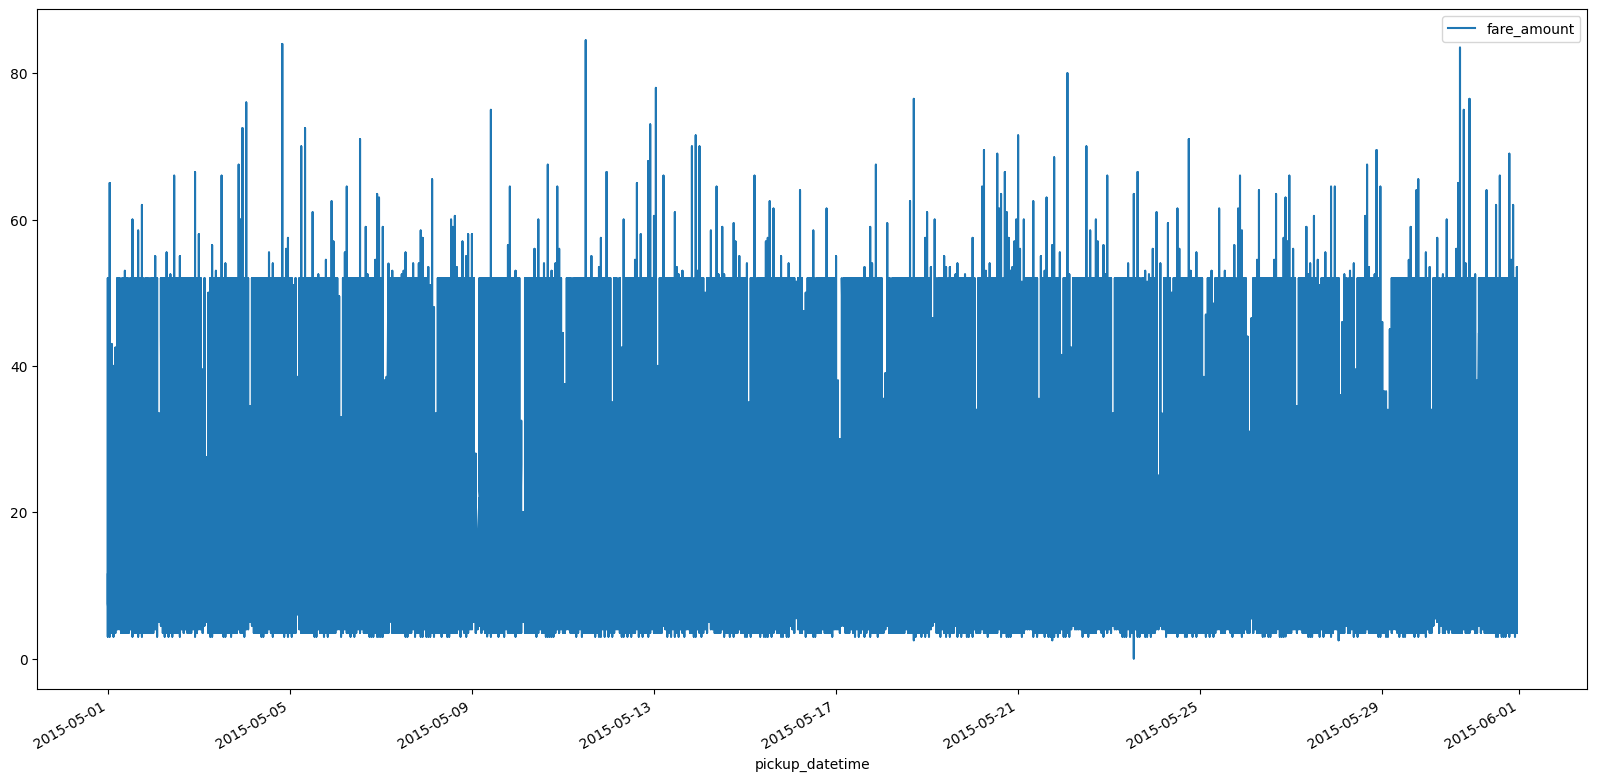

In [174]:
data.plot(x="pickup_datetime",y=["fare_amount"],figsize=(20, 10))

# Codes, Longitude and Latitude analysis

Enforce string type on nta codes

In [175]:
data.dtypes
data['pickup_nta_code']=data['pickup_nta_code'].map(str)
data['dropoff_nta_code']=data['dropoff_nta_code'].map(str)

Check if all Fares are inside of New York and the area around it

<Axes: xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

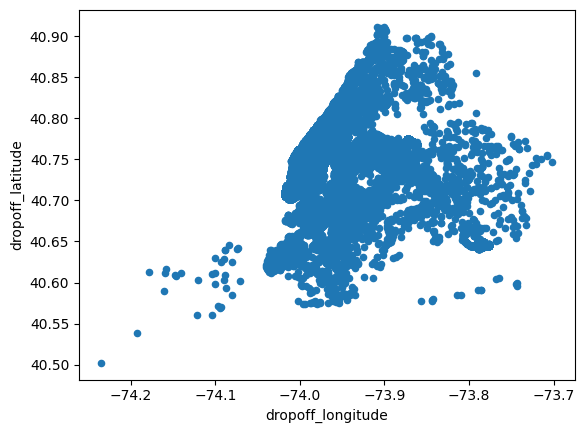

In [176]:
data.plot.scatter(x='dropoff_longitude',y='dropoff_latitude')

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

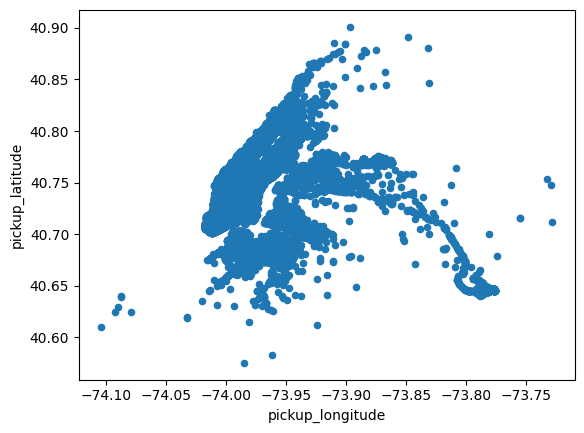

In [177]:
data.plot.scatter(x='pickup_longitude',y='pickup_latitude')

Since NTA and borough codes are based entirely on longitude and latitude, they should predict codes with above 99% accuracy

Pickup NTA only has 96.75% accuracy: residuals could be investigated to see if they are really wrong and if so if there is any pattern

In [178]:
import sklearn as sklearn
from sklearn import tree
classifier = tree.ExtraTreeClassifier(class_weight="balanced")
X = data[['pickup_longitude','pickup_latitude']]
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,data['pickup_nta_code'])
classifier.fit(X_train, Y_train)
classifier.score(X_test, Y_test)
print(classifier.score(X_test, Y_test)) 

0.9450047833811671


In [179]:
predicted=classifier.predict(X)
data_code=data.copy()
data_code["predicted_nta"]=pd.Series(predicted)
diff_mask=pd.Series(predicted)!=data["pickup_nta_code"]
negative_mask=pd.Series(predicted)==data["pickup_nta_code"]


ValueError: Can only compare identically-labeled Series objects

In [ ]:
def plot_difference(code):
    code_mask=data_code["pickup_nta_code"].str.contains((code))
    plt.clf()
    plt.scatter(data.loc[negative_mask & code_mask]['pickup_longitude'],data.loc[negative_mask & code_mask]['pickup_latitude'], color = 'blue', label = "nta predicted correctly", alpha = 0.5)
    plt.scatter(data.loc[diff_mask & code_mask]['pickup_longitude'],data.loc[diff_mask & code_mask]['pickup_latitude'], color = 'red', label = "nta predicted incorrectly", alpha = 0.6)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title('Map')
    plt.legend()

In [ ]:
print(data_code[diff_mask]["pickup_nta_code"].value_counts()[0:20])


NameError: name 'diff_mask' is not defined

Most of the outliers find themselves at the border of areas. We therefore can conclude that code data is relaiable.

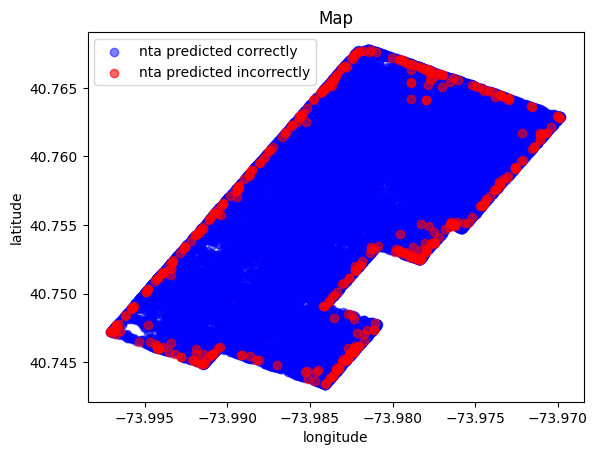

In [ ]:
plot_difference("MN17")

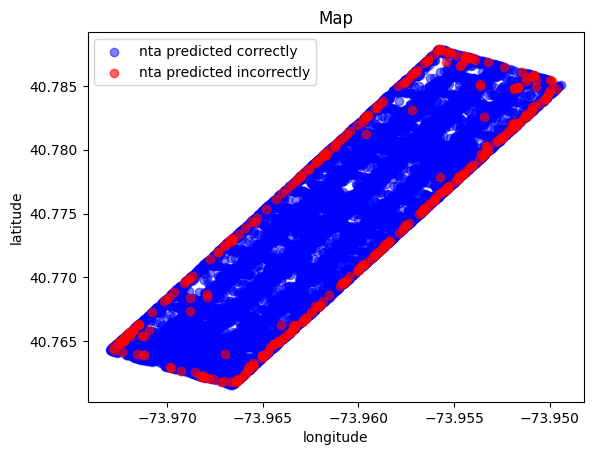

In [ ]:
plot_difference("MN40")

MN99 is a code for all parks in Manhatan and this is why there are multiple clusters.

In [180]:
plot_difference("MN99")

NameError: name 'negative_mask' is not defined

<Figure size 640x480 with 0 Axes>

In [181]:
plot_difference("MN13")

NameError: name 'negative_mask' is not defined

<Figure size 640x480 with 0 Axes>

In [182]:
plot_difference("MN20")

NameError: name 'negative_mask' is not defined

<Figure size 640x480 with 0 Axes>

Pickup borough has 99.98% accuracy, the data should be entirely correct

In [183]:
classifier=tree.ExtraTreeClassifier()
X=data[['pickup_longitude','pickup_latitude']]
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,data['pickup_boro_code'])
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test) ## Perfect accuracy on Boro code
print(classifier.score(X_test,Y_test)) ## Perfect accuracy on Boro code

0.9994259942599426


Dropoff NTA only has 96.35% accuracy: residuals could be investigated to see if they are really wrong and if so if there is any pattern

In [184]:
classifier=tree.ExtraTreeClassifier()
X=data[['dropoff_longitude','dropoff_latitude']]
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,data['dropoff_nta_code'])
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test)
print(classifier.score(X_test,Y_test)) 

0.9459341260079267


In [185]:
predicted=classifier.predict(X)
data_code=data.copy()
data_code["predicted_nta"]=pd.Series(predicted)
diff_mask=pd.Series(predicted)!=data["dropoff_nta_code"]
negative_mask=pd.Series(predicted)==data["dropoff_nta_code"]

ValueError: Can only compare identically-labeled Series objects

In [186]:
def plot_difference(code):
    code_mask=data_code["dropoff_nta_code"].str.contains((code))
    plt.clf()
    plt.scatter(data.loc[negative_mask & code_mask]['dropoff_longitude'],data.loc[negative_mask & code_mask]['dropoff_latitude'], color = 'blue', label = "nta predicted correctly", alpha = 0.5)
    plt.scatter(data.loc[diff_mask & code_mask]['dropoff_longitude'],data.loc[diff_mask & code_mask]['dropoff_latitude'], color = 'red', label = "nta predicted incorrectly", alpha = 0.6)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title('Map')
    plt.legend()

In [187]:
print(data_code[diff_mask]["pickup_nta_code"].value_counts()[0:20])

NameError: name 'diff_mask' is not defined

As most residuals find themselves on the border, we can assume data to be reliable.

In [188]:
plot_difference("MN17")

NameError: name 'negative_mask' is not defined

<Figure size 640x480 with 0 Axes>

In [189]:
plot_difference("MN13")

NameError: name 'negative_mask' is not defined

<Figure size 640x480 with 0 Axes>

In [190]:
plot_difference("MN40")

NameError: name 'negative_mask' is not defined

<Figure size 640x480 with 0 Axes>

In [191]:
plot_difference("MN23")

NameError: name 'negative_mask' is not defined

<Figure size 640x480 with 0 Axes>

There are 2 clusters as QN98 is a code for both JFK Airport and LaGuardia Airport

In [192]:
plot_difference("QN98")

NameError: name 'negative_mask' is not defined

<Figure size 640x480 with 0 Axes>

Dropoff borough code has 99.92% accuracy: we can assume no error in the data

In [193]:
classifier=tree.ExtraTreeClassifier()
X=data[['dropoff_longitude','dropoff_latitude']]
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,data['dropoff_boro_code'])
classifier.fit(X_train,Y_train)
print(classifier.score(X_test,Y_test)) ## Perfect accuracy on Boro code


0.9982779827798278


## BoroCode

BoroCode represents the 5 different Boroughs of New York. This means it is a categorical variable and not a numerical (continous) one. From  https://locatenyc.io/detail-bin we see that: 1 is Manhattan, 2 is The Bronx, 3 is Brooklyn,  4 is Queens, and 5 is Staten Island, therefore we change the numbers of pickup_boro_code and dropoff_boro_code to their respective borough.

In [194]:
borough_mapping = {
    "1": "Manhattan",
    "2": "The Bronx",
    "3": "Brooklyn",
    "4": "Queens",
    "5": "Staten Island"}

# Apply mapping to the column
data['pickup_boro_code'] = data['pickup_boro_code'].astype(str).map(borough_mapping)
data['dropoff_boro_code'] = data['dropoff_boro_code'].astype(str).map(borough_mapping)
data.head()


,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,predicted_fare,pred_diff,pickup_datetime,pickup_week,pickup_wday
0,807,Manhattan,MN31,Manhattan,MN17,-73.951279,40.769939,-73.973137,40.759491,2,1,2.27,10.5,MN31-MN17,11.253213,0.753213,2015-05-24 07:00:00,21,Sunday
1,1458,Manhattan,MN23,Brooklyn,BK73,-73.998993,40.730064,-73.959808,40.710918,1,1,3.20,18.0,MN23-BK73,16.909274,-1.090726,2015-05-21 00:00:00,21,Thursday
2,495,Manhattan,MN27,Brooklyn,BK76,-73.994148,40.717796,-73.948204,40.722595,1,1,3.40,12.0,MN27-BK76,11.591685,-0.408315,2015-05-04 23:00:00,19,Monday
3,941,Manhattan,MN20,Manhattan,MN40,-73.979813,40.743240,-73.952881,40.780380,2,2,2.93,13.0,MN20-MN40,13.324187,0.324187,2015-05-13 19:00:00,20,Wednesday
4,141,Manhattan,MN22,Manhattan,MN22,-73.983543,40.726109,-73.988991,40.729980,2,1,0.47,3.5,MN22-MN22,3.824732,0.324732,2015-05-01 20:00:00,18,Friday


## Checking the pair codes with the pickup and droppoff codes

In [195]:
first_code_data = data["pickup_nta_code"]
last_code_data = data["dropoff_nta_code"]
pair = data["pair"]

data_pair = first_code_data + "-" + last_code_data

list = data_pair == pair
all(list)

True

## Check that first two letters of NTAcode correspond to the right borough.

In [196]:
data['first_two_letters_pickup'] = data['pickup_nta_code'].apply(lambda x: x[:2])
data['first_two_letters_dropoff']= data['dropoff_nta_code'].apply(lambda x: x[:2])
data['first_two_letters_pickup'].value_counts()

first_two_letters_pickup
MN    135604
QN      8024
BK      2642
BX        63
SI         6
Name: count, dtype: int64

In [197]:

nta_mapping = {
    "MN": "Manhattan",
    "BX": "The Bronx",
    "BK": "Brooklyn",
    "QN": "Queens",
    "SI": "Staten Island"}

# Apply mapping to the column
data['first_two_letters_pickup'] = data['first_two_letters_pickup'].astype(str).map(nta_mapping)
data['first_two_letters_dropoff'] = data['first_two_letters_dropoff'].astype(str).map(nta_mapping)
data.head()
assert np.array_equal(np.array(data['first_two_letters_pickup']), np.array(data['pickup_boro_code']))
assert np.array_equal(np.array(data['first_two_letters_dropoff']), np.array(data['dropoff_boro_code']))

In [198]:
(data['first_two_letters_pickup'].equals(data['pickup_boro_code']), data['first_two_letters_dropoff'].equals(data['dropoff_boro_code']))


(True, True)

Since these columns are identical, it means that the first two letters of NTA code match the borough so we can delete the auxillary columns and the pair column. Here we also delete the auxiliary variables, 'predicted_fare', 'pred_diff',  created from the prediction of the linear model as they are not used anymore.

In [199]:
data.drop(['first_two_letters_pickup', 'first_two_letters_dropoff','pair', 'predicted_fare', 'pred_diff'], axis=1, inplace = True)

# Correlations Matrix

We drop categorical variables that have too many categories for a feasible correlation analysis

In [200]:
cor_data=pd.get_dummies(data.drop(["pickup_nta_code","dropoff_nta_code","pair"], axis=1))

KeyError: "['pair'] not found in axis"

In [201]:
cor_data

NameError: name 'cor_data' is not defined

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(correlation_matrix):
    plt.figure(figsize=(20, 20))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title('Correlation Matrix')
    plt.show()


In [203]:
cor_mat=cor_data.corr()

NameError: name 'cor_data' is not defined

The correlation matrix shows both expected and unexpected correlations. Fare amount correlates with some dropoff locations: negatively for Manhattan and positively for Queens and Brooklyn. Its the same with pickup locations, except for Brooklyn where it becomes close to 0. It's also correlated with other numeric variables, but we know well from former regression analysis that they are predictiors of fare. We can clearly see that there is a difference in passanger count within 2 possible vendors. Latitude and longitude obviously correlates with codes for places and each week has a weak correlation with days, both are to be expected.

In [204]:
plot_correlation_matrix(cor_mat)

NameError: name 'cor_mat' is not defined

# Vendor_Id ANOVA using boxplot

## Fare amount

Since Vendor_Id is a column containing only 2 distinct values, we decided to see how much does distribution of price and passengers differ among vendors to see how much information vendor id carries.

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_box_plot(data, x_col,y_col, **args):

    plt.clf()
    plt.figure(figsize=(25, 12)) 
    sns.boxplot(x=data[x_col],y=data[y_col],**args,whis=1.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()



<Figure size 640x480 with 0 Axes>

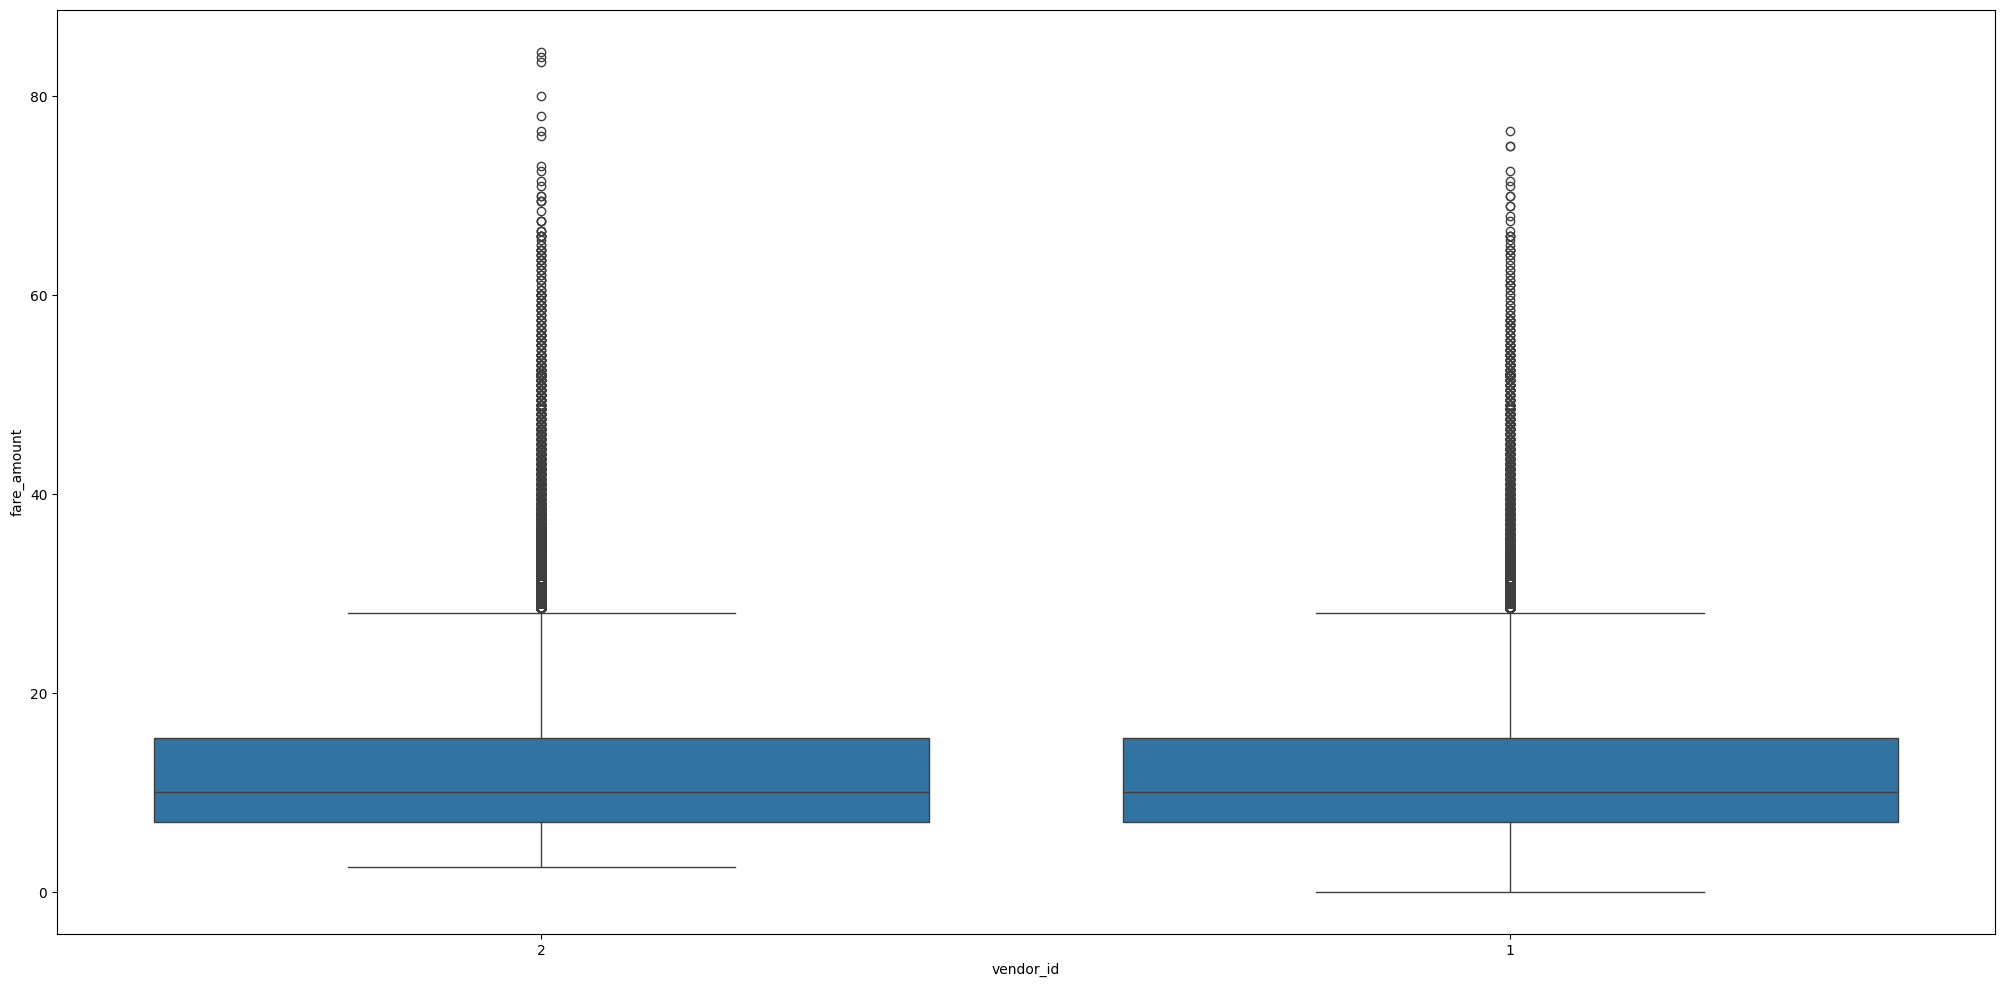

In [206]:
create_box_plot(data,x_col="vendor_id",y_col="fare_amount")


As we can see above, 1st vendor has less of extreme outliers compared to 2nd vendor. However since we are interested in overall distribution we graph it below restricting outlier in the price.

<Figure size 640x480 with 0 Axes>

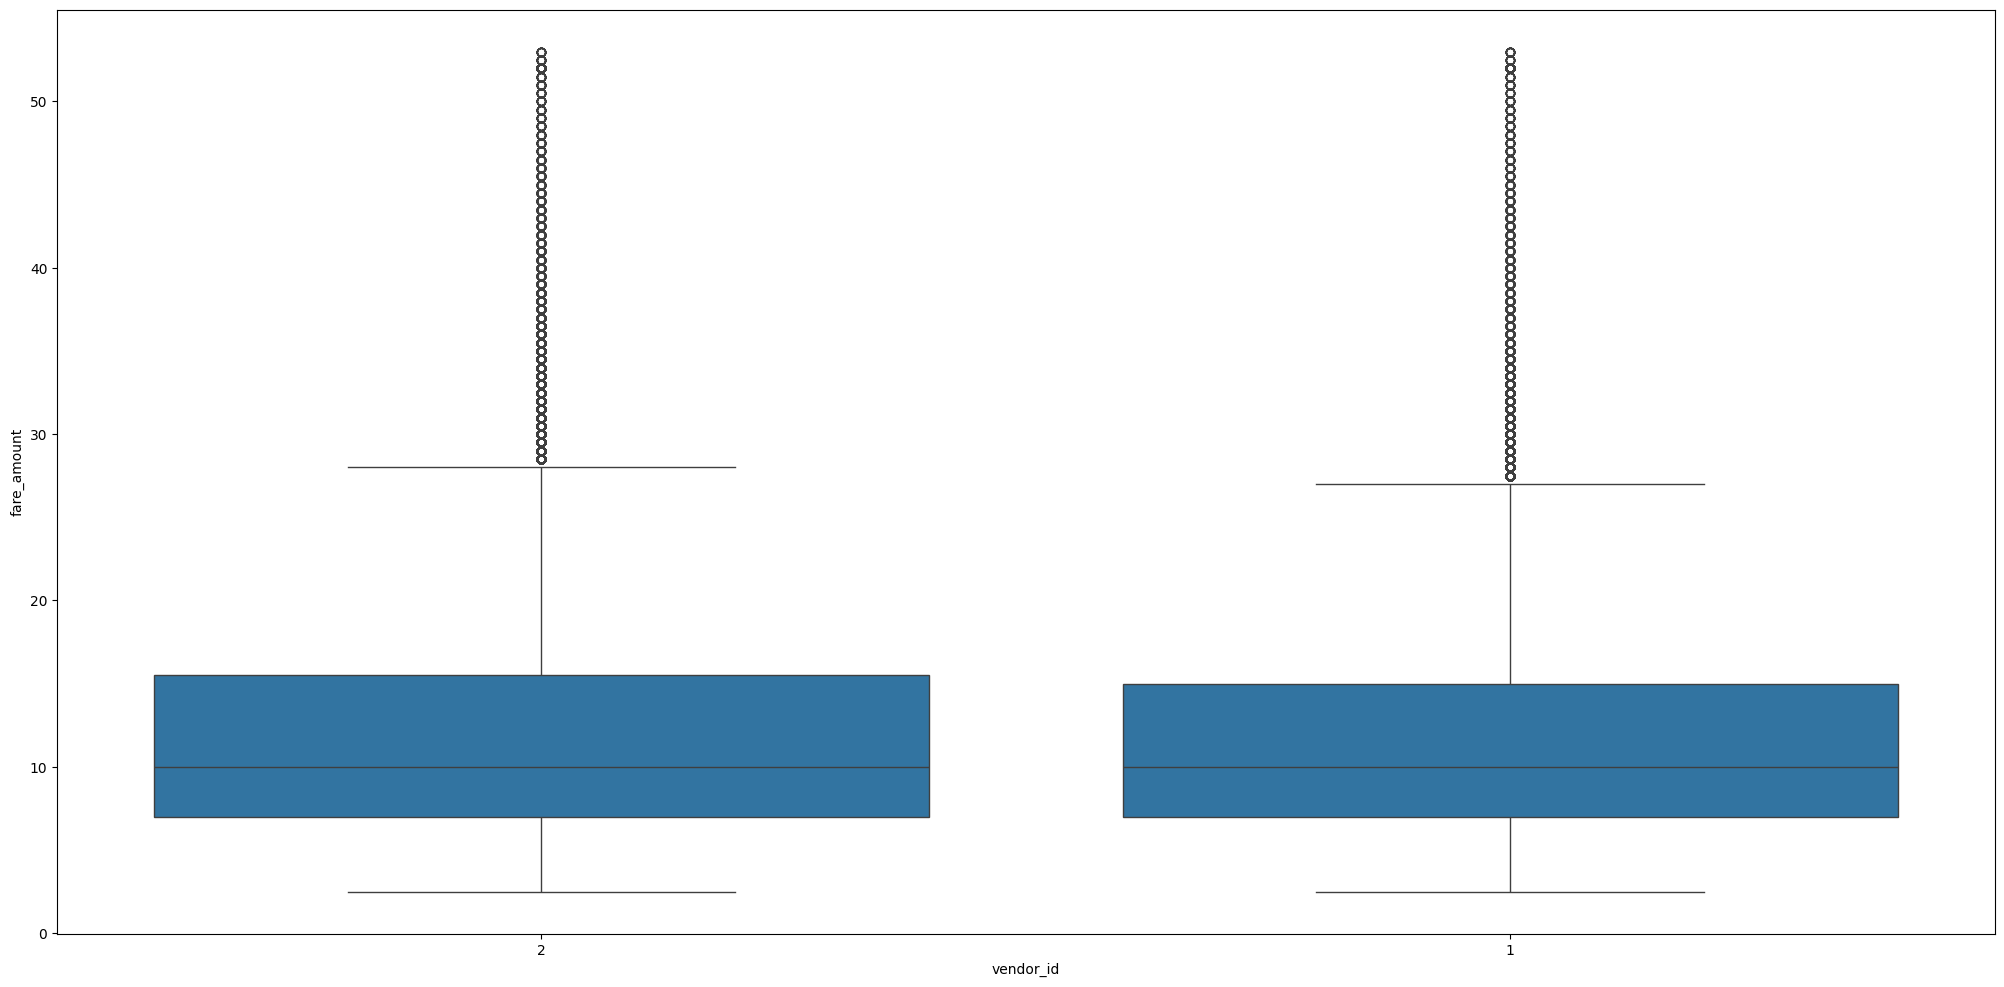

In [207]:
fare_mask=data["fare_amount"]<=53
fare_mask_down=data["fare_amount"]>0.01 
masked=data[fare_mask & fare_mask_down]
create_box_plot(masked,x_col="vendor_id",y_col="fare_amount")


<Axes: >

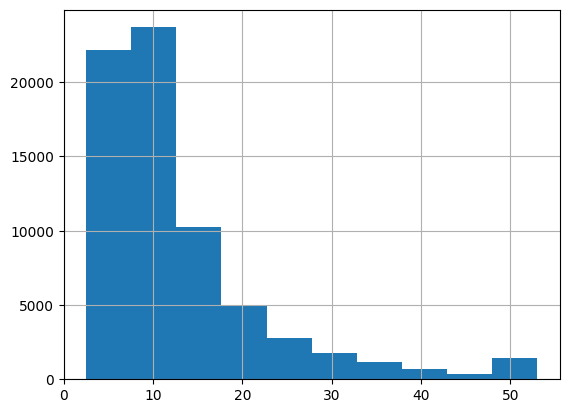

In [208]:
masked["fare_amount"].loc[masked["vendor_id"]=="1"].hist()

<Axes: >

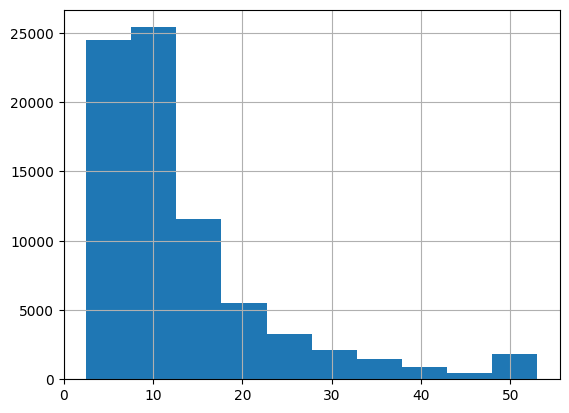

In [209]:
masked[masked["vendor_id"]=="2"]["fare_amount"].hist()

As we can see form boxplots and histograms the only other difference in distribution is that vendor 2 has significantly less proportion of low fare rides

## Passanger count

As we can see there are bigg differences in distribution of passangers. Company 2 is clearly favoured by groups of 2 or more people. Possibly they have discounts or bigger vehicles in operations more often.

<Figure size 640x480 with 0 Axes>

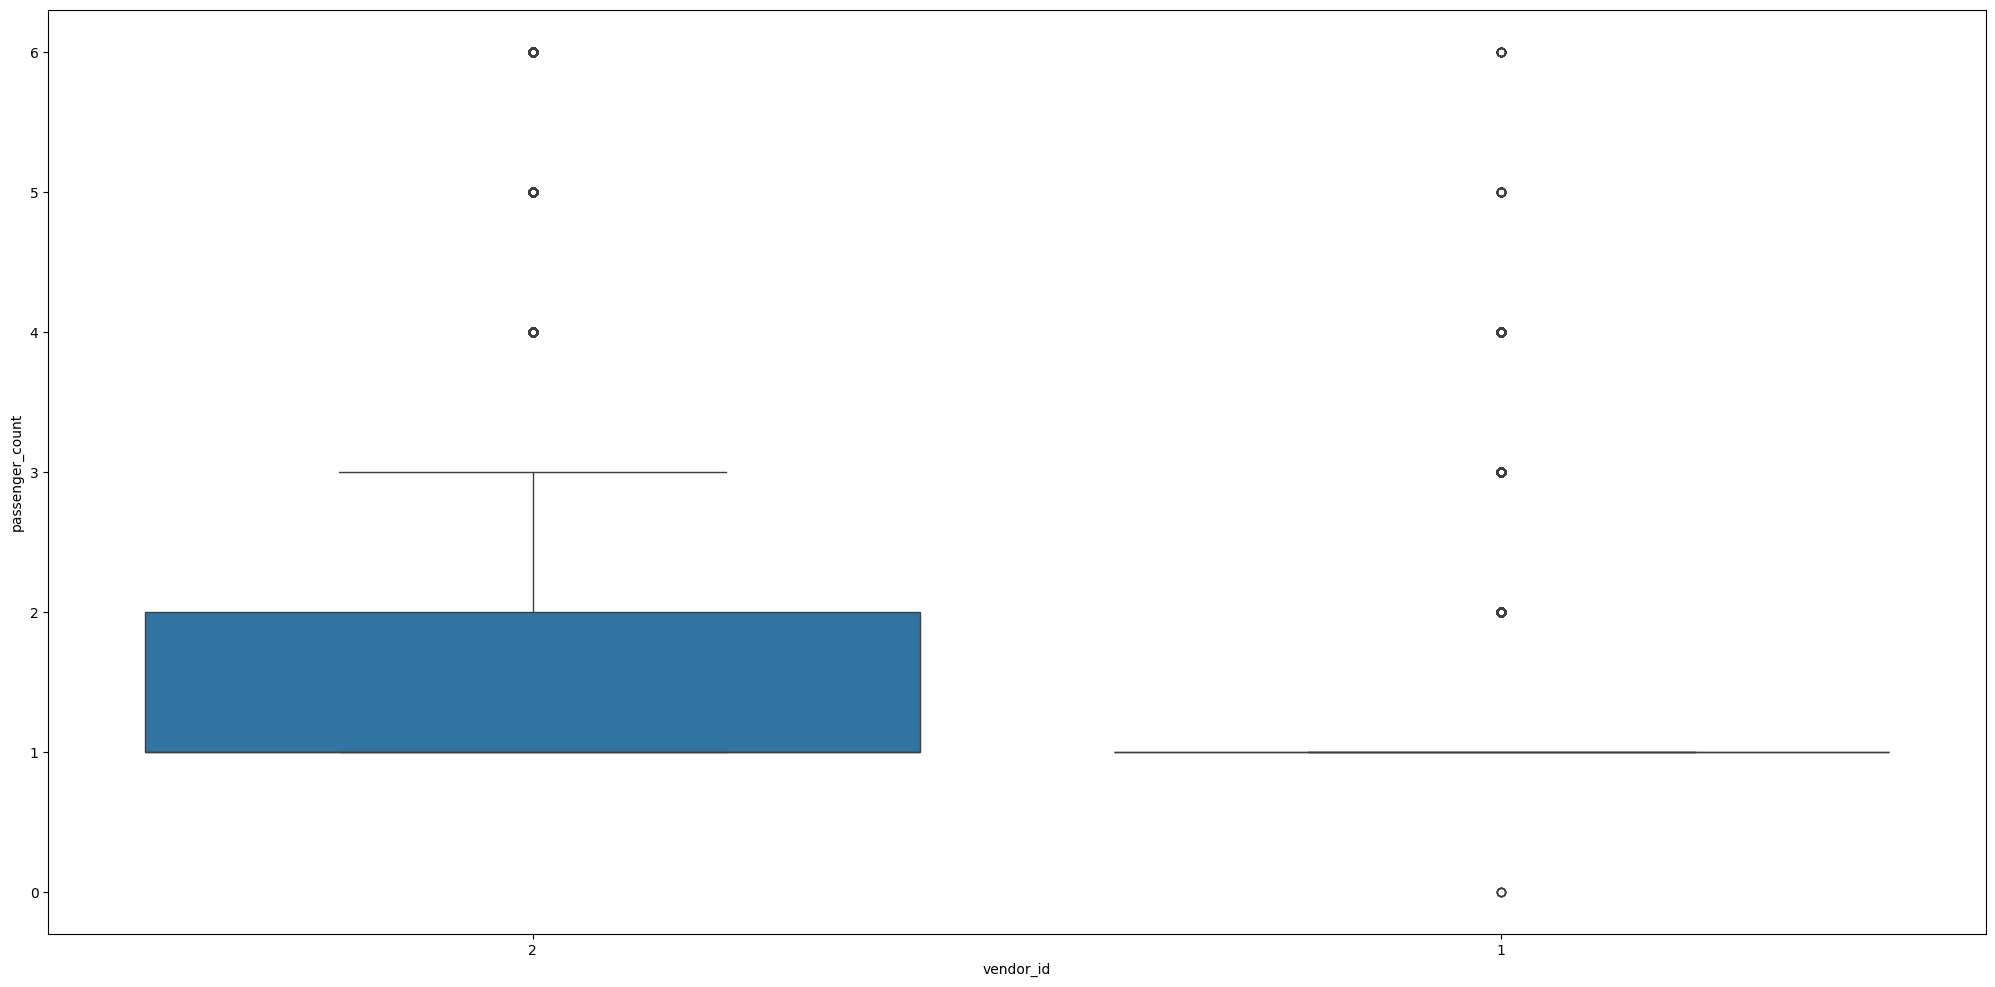

In [210]:
create_box_plot(data,x_col="vendor_id",y_col="passenger_count")

<Axes: >

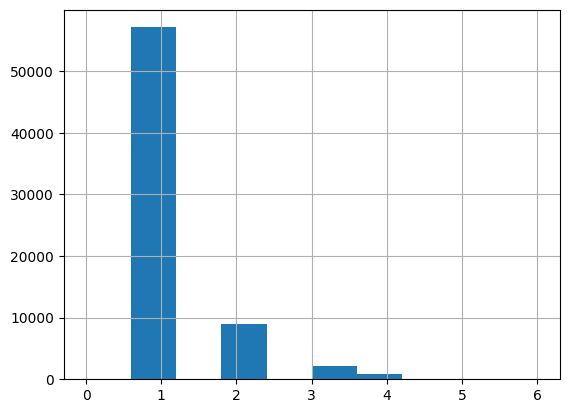

In [211]:
masked["passenger_count"].loc[masked["vendor_id"]=="1"].hist()

<Axes: >

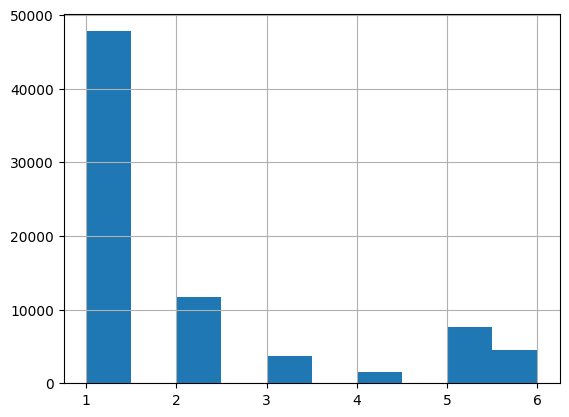

In [212]:
masked["passenger_count"].loc[masked["vendor_id"]=="2"].hist()

In [213]:
data

,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pickup_datetime,pickup_week,pickup_wday
0,807,Manhattan,MN31,Manhattan,MN17,-73.951279,40.769939,-73.973137,40.759491,2,1,2.27,10.5,2015-05-24 07:00:00,21,Sunday
1,1458,Manhattan,MN23,Brooklyn,BK73,-73.998993,40.730064,-73.959808,40.710918,1,1,3.20,18.0,2015-05-21 00:00:00,21,Thursday
2,495,Manhattan,MN27,Brooklyn,BK76,-73.994148,40.717796,-73.948204,40.722595,1,1,3.40,12.0,2015-05-04 23:00:00,19,Monday
3,941,Manhattan,MN20,Manhattan,MN40,-73.979813,40.743240,-73.952881,40.780380,2,2,2.93,13.0,2015-05-13 19:00:00,20,Wednesday
4,141,Manhattan,MN22,Manhattan,MN22,-73.983543,40.726109,-73.988991,40.729980,2,1,0.47,3.5,2015-05-01 20:00:00,18,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147541,2355,Manhattan,MN99,Manhattan,MN13,-73.956779,40.786560,-74.006859,40.744862,2,5,5.28,27.0,2015-05-13 12:00:00,20,Wednesday
147542,824,Manhattan,MN17,Manhattan,MN15,-73.979660,40.761322,-74.001076,40.762772,1,2,1.50,10.0,2015-05-23 09:00:00,21,Saturday
147543,524,Manhattan,MN31,Manhattan,MN19,-73.957153,40.769859,-73.974380,40.751595,1,1,1.70,8.0,2015-05-14 11:00:00,20,Thursday
147544,946,Manhattan,MN17,Manhattan,MN13,-73.976196,40.763760,-73.985512,40.742229,2,1,1.84,11.0,2015-05-04 15:00:00,19,Monday


# Exporting final dataset to CSV

In [214]:
data.shape
data.to_csv('cleaned_test.csv', index=False)